<a href="https://colab.research.google.com/github/praveenkannan39/Sentiment-Analysis-Predicting-sentiment-of-COVID-19-tweets/blob/main/Sentiment_Analysis_Predicting_sentiment_of_COVID_19_tweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project Name :: Ted Talk Views Prediction
---


##Project Type :: Supervising Learning(Classification)
##Contribution :: Individual
##Name :: Praveen Kannan
##Github Link ::


#Problem Statement:

The objective of this machine learning project is to develop a classification model for sentiment analysis of COVID-19 tweets. The dataset consists of tweets collected from Twitter, and each tweet has been manually tagged with a sentiment label. To protect privacy, names and usernames have been encoded with codes.

Sentiment analysis is a technique used to determine the emotional tone or sentiment expressed in text data. In the context of COVID-19 tweets, sentiment analysis can provide valuable insights into public opinions, emotions, and attitudes towards the pandemic.

The task at hand involves building a machine learning model that can accurately classify the sentiment of COVID-19 tweets into one of the following categories: positive, negative, or neutral. This classification will help in understanding the overall sentiment of public discussions related to the coronavirus.

To successfully complete this project, the following steps should be followed:
*   Data Preprocessing: Explore and preprocess the provided dataset. This involves
tasks such as cleaning the text, removing irrelevant information, handling special characters or symbols, and converting the text into a suitable format for modeling.
*   Feature Extraction: Extract relevant features from the preprocessed text data. Consider techniques such as bag-of-words, TF-IDF, or word embeddings to represent the tweets. These features will serve as input to the classification model.
*   Model Selection and Training: Select an appropriate machine learning algorithm for sentiment classification, such as logistic regression, random forest, or support vector machines. Train the model using the prepared features and the corresponding sentiment labels from the dataset.
*   Model Evaluation: Evaluate the performance of the trained model using appropriate evaluation metrics, such as accuracy, precision, recall, and F1 score. It is recommended to employ techniques like cross-validation to ensure reliable results and identify potential overfitting.
*   Sentiment Prediction: Deploy the trained model to make predictions on new, unseen tweets related to COVID-19. Demonstrate the model's ability to accurately classify the sentiment of these tweets. Consider building a user-friendly interface or a script to facilitate the prediction process.

Throughout the project, document your approach, explain the choices made, and provide justifications for decisions. Experiment with different preprocessing techniques, feature extraction methods, and classification algorithms to optimize the model's performance. Additionally, address any limitations or challenges specific to sentiment analysis in the context of COVID-19 tweets and propose potential solutions.

By the end of the project, we should have a robust and reliable classification model that can effectively analyze the sentiment of COVID-19 tweets.

#Project Workflow

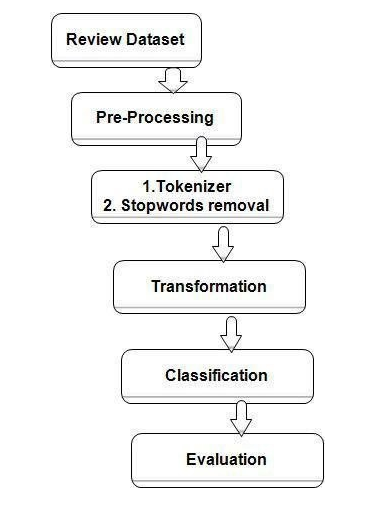

##Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
from numpy import percentile
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import re # for regular expressions
import pandas as pd
pd.set_option("display.max_colwidth", 200)
import string
import nltk # for text manipulation
from nltk.stem.porter import *
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from tqdm import tqdm
from gensim.models.doc2vec import TaggedDocument
import gensim
from sklearn.linear_model import LogisticRegression
from scipy import stats
from sklearn import metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error, make_scorer,classification_report,confusion_matrix,accuracy_score,roc_auc_score,roc_curve
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.naive_bayes import BernoulliNB
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import xgboost as xgb
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline


import gensim
from gensim.models import word2vec
from gensim.models import doc2vec

#DATA WRANGLING
##Data Gathering

In [ ]:
#Loading Dataset
df = pd.read_csv("/content/drive/MyDrive/CSV files/Coronavirus Tweets.csv", encoding='latin1')

In [ ]:
df.sample(5)

UserName  ScreenName         Location     TweetAt  \
36598     40397       85349  Sioux Falls, SD  09-04-2020   
2864       6663       51615      Houston, TX  18-03-2020   
178        3977       48929              NaN  16-03-2020   
25728     29527       74479              NaN  01-04-2020   
6667      10466       55418              NaN  19-03-2020   

                                                                                                                                                                                                 OriginalTweet  \
36598  6 Stocks That Will Benefit From a Dovish Federal Reserve (ad)\r\r\nThese six stocks stand to benefit from both low-interest rates and the unique economic conditions being brought on by the Covid-1...   
2864                                         Thank you to the grocery store stockers the cashiers the truck drivers the food workers for school districts and many unsung heroes helping us during th pandemic   
178    Taken by Henk Zwoferink on Saturday in WÃ¶rgl, our black beauty hauled a train bringing the last tourists home. Our colleagues are #workinghard to keep supply chains running while respecting the m...   
25728    Wam Dubai Economy has launched a  Price Monitor  portal to track daily prices of staple foods and essentials making sure that consumers continue to get their basic needs at fair prices in view o...   
6667   Don't miss your FREE 72-page land report with an analysis of land prices in 2019, land trends over the last 13 years and we reveal who is buying land. Plus a surge of cattle numbers in marts and #...   

                Sentiment  
36598  Extremely Positive  
2864   Extremely Positive  
178    Extremely Positive  
25728  Extremely Positive  
6667             Positive

In [ ]:
#Shape of dataset
df.shape

(41157, 6)

In [ ]:
df.head(2)

UserName  ScreenName Location     TweetAt  \
0      3799       48751   London  16-03-2020   
1      3800       48752       UK  16-03-2020   

                                                                                                                                                                                             OriginalTweet  \
0                                                                                          @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8   
1  advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate su...   

  Sentiment  
0   Neutral  
1  Positive

In [ ]:
df.tail(2)

UserName  ScreenName                      Location     TweetAt  \
41155     44954       89906                           NaN  14-04-2020   
41156     44955       89907  i love you so much || he/him  14-04-2020   

                                                                                                                                                                                                 OriginalTweet  \
41155                                                                                    Is it wrong that the smell of hand sanitizer is starting to turn me on?\r\r\n\r\r\n#coronavirus #COVID19 #coronavirus   
41156  @TartiiCat Well new/used Rift S are going for $700.00 on Amazon rn although the normal market price is usually $400.00 . Prices are really crazy right now for vr headsets since HL Alex was announc...   

      Sentiment  
41155   Neutral  
41156  Negative

##Attributes and their Description



*   UserName - Coded Username
*   ScreenName - Coded Screen name
*   Location - Region of Origin
*   TweetAt - Tweet Timing
*   OriginalTweet - First Tweet in the tread
*   Sentiment - Sentiment of the tweet



##Data Accessing

In [ ]:
# Checking the information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [ ]:
# Obtaining the statistical summary of all columns using describe
df.describe(include='all')

UserName    ScreenName Location     TweetAt  \
count   41157.000000  41157.000000    32567       41157   
unique           NaN           NaN    12220          30   
top              NaN           NaN   London  20-03-2020   
freq             NaN           NaN      540        3448   
mean    24377.000000  69329.000000      NaN         NaN   
std     11881.146851  11881.146851      NaN         NaN   
min      3799.000000  48751.000000      NaN         NaN   
25%     14088.000000  59040.000000      NaN         NaN   
50%     24377.000000  69329.000000      NaN         NaN   
75%     34666.000000  79618.000000      NaN         NaN   
max     44955.000000  89907.000000      NaN         NaN   

                                                                                                          OriginalTweet  \
count                                                                                                             41157   
unique                                                                                                            41157   
top     @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8   
freq                                                                                                                  1   
mean                                                                                                                NaN   
std                                                                                                                 NaN   
min                                                                                                                 NaN   
25%                                                                                                                 NaN   
50%                                                                                                                 NaN   
75%                                                                                                                 NaN   
max                                                                                                                 NaN   

       Sentiment  
count      41157  
unique         5  
top     Positive  
freq       11422  
mean         NaN  
std          NaN  
min          NaN  
25%          NaN  
50%          NaN  
75%          NaN  
max          NaN

In [ ]:
# Looking for Columns in dataset

pd.DataFrame(df.columns, columns=['Column Names'])

Column Names
0       UserName
1     ScreenName
2       Location
3        TweetAt
4  OriginalTweet
5      Sentiment

In [ ]:
# Looking for unique values in each columns/Attributes of dataset

for column in df.columns:
    unique_values = df[column].nunique()
    print("Total Unique Values in", column, "-", unique_values)

Total Unique Values in UserName - 41157
Total Unique Values in ScreenName - 41157
Total Unique Values in Location - 12220
Total Unique Values in TweetAt - 30
Total Unique Values in OriginalTweet - 41157
Total Unique Values in Sentiment - 5


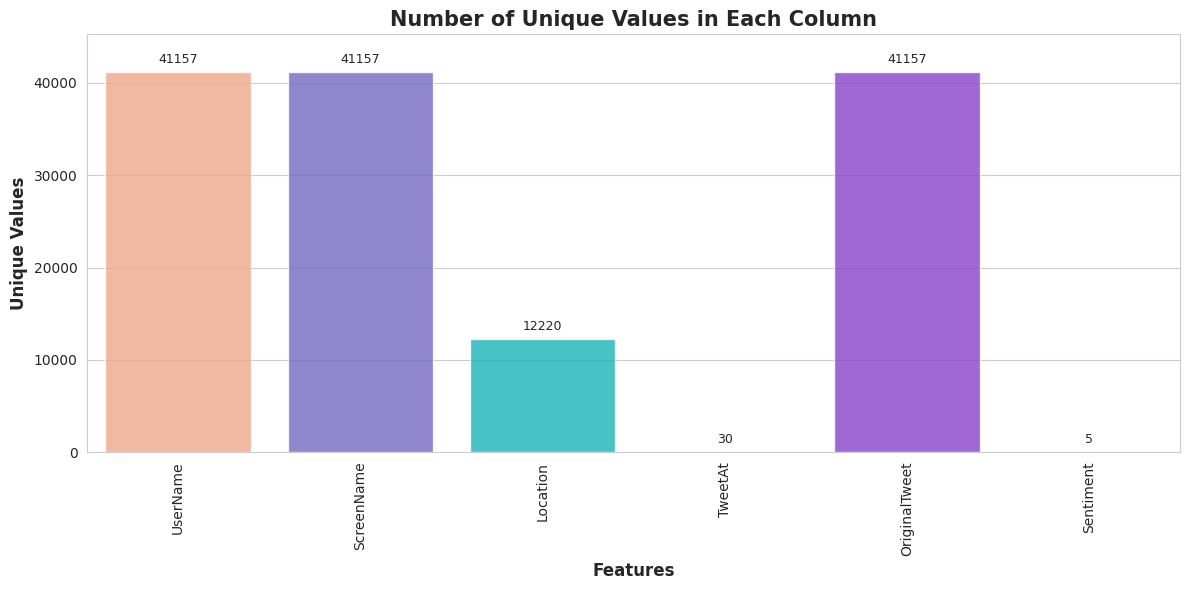

In [ ]:
# Viewing Number of Unique Values in Each Column
unique_df = pd.DataFrame()
unique_df['Features'] = df.columns
unique_df['Uniques'] = [df[i].nunique() for i in df.columns]

plt.figure(figsize=(12, 6))
sns.set_style('whitegrid')

# Defining a custom color palette
custom_palette = ["#FFA07A", "#6A5ACD", "#00CED1", "#FF6347", "#8A2BE2"]

splot = sns.barplot(x='Features', y='Uniques', data=unique_df, alpha=0.8, palette=custom_palette)

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center',
                   va='center', xytext=(0, 9), textcoords='offset points', fontsize=9)

plt.title('Number of Unique Values in Each Column', weight='bold', size=15)
plt.ylabel('Unique Values', size=12, weight='bold')
plt.xlabel('Features', size=12, weight='bold')
plt.xticks(rotation=90)
plt.ylim(0, max(unique_df['Uniques']) * 1.1)

plt.tight_layout()
plt.show()


The consistency of unique values (41,157) in the User Name, Screen Name, and Original Tweet columns suggests that each user has a distinct screen name and corresponds to a unique original tweet in the dataset. This alignment indicates that the dataset comprises a diverse range of users, locations, and conversations. The large number of unique values in these columns further implies that the dataset is substantial and encompasses a wide variety of users, locations, and threads, offering rich potential for analysis and insights.

In [ ]:
# Checking null value

null_num = []
for i in df.columns:
    x = df[i].isnull().sum()
    null_num.append(x)

# Create a DataFrame to store the results and sort in descending order
null_df = pd.DataFrame(null_num, index=df.columns, columns=['Total missing values']).sort_values(by='Total missing values', ascending=False)


null_df


Total missing values
Location                       8590
UserName                          0
ScreenName                        0
TweetAt                           0
OriginalTweet                     0
Sentiment                         0


We have identified missing values in the Location column, with a total of 8,590 missing values. However, since we are not considering the Location column in our sentiment analysis, we can safely ignore these missing values. Our main focus is on the OriginalTweet column and the Sentiment column. Therefore, the missing values in the Location column will not affect our analysis or the insights we derive from it.

In [ ]:
# Calculate the percentage of null values for each column and round to two decimal places
null_percentages = (df.isnull().sum() / len(df) * 100).round(2)

# Create a new DataFrame to store the results
null_df = pd.DataFrame({'Column': null_percentages.index, 'Null Percentage': null_percentages.values})

# Sort the DataFrame by the null percentage in descending order
null_df = null_df.sort_values(by='Null Percentage', ascending=False)

# Display the null percentages with two digits after the decimal point
null_df

Column  Null Percentage
2       Location            20.87
0       UserName             0.00
1     ScreenName             0.00
3        TweetAt             0.00
4  OriginalTweet             0.00
5      Sentiment             0.00

In [ ]:
#Checking duplicates in the dataset.
df.duplicated().sum()

0

In [ ]:
#Describing the numerical values.
df.describe().T

count     mean           std      min      25%      50%  \
UserName    41157.0  24377.0  11881.146851   3799.0  14088.0  24377.0   
ScreenName  41157.0  69329.0  11881.146851  48751.0  59040.0  69329.0   

                75%      max  
UserName    34666.0  44955.0  
ScreenName  79618.0  89907.0

In [ ]:
#Describing the categorical values
df.describe(include='O').T

count unique  \
Location       32567  12220   
TweetAt        41157     30   
OriginalTweet  41157  41157   
Sentiment      41157      5   

                                                                                                                           top  \
Location                                                                                                                London   
TweetAt                                                                                                             20-03-2020   
OriginalTweet  @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8   
Sentiment                                                                                                             Positive   

                freq  
Location         540  
TweetAt         3448  
OriginalTweet      1  
Sentiment      11422

#Exploratory Data Analysis on Features.
##Location





In [ ]:
# Looking into the count value of different Location
location_counts = df['Location'].value_counts().head(15)
location_counts_df = pd.DataFrame(location_counts)

# Rename the column for clarity
location_counts_df = location_counts_df.rename(columns={'Location': 'Count'})

# Display the DataFrame
location_counts_df


Count
London                     540
United States              528
London, England            520
New York, NY               395
Washington, DC             373
United Kingdom             337
Los Angeles, CA            281
India                      268
UK                         232
Australia                  225
USA                        223
Canada                     191
England, United Kingdom    191
Toronto, Ontario           160
Global                     159

The location counts offer valuable insights into the geographic distribution of tweets within the dataset. London emerges as the most frequently mentioned location, with 540 mentions, indicating its significance in the discussions. The United States closely follows with 528 mentions, suggesting a substantial representation of tweets related to the country. London, England is also highly mentioned with 520 tweets, emphasizing the need to distinguish it from other locations with similar names.

New York, NY and Washington, DC stand out with 395 and 373 mentions respectively, indicating their prominence as locations within the dataset. These numbers suggest a focus on discussions or events related to these major cities. The United Kingdom, with 337 mentions, showcases a diverse range of tweets related to various locations within the country.

Los Angeles, CA, with 281 mentions, holds significance as a location discussed in the dataset, while India's 268 mentions indicate discussions or topics related to the country. The abbreviation "UK" appears 232 times, representing mentions of the United Kingdom, and Australia follows closely with 225 mentions.

The term "USA" appears 223 times, reflecting references to the United States, and Canada has 191 mentions, suggesting discussions or topics related to the country. Notably, both "England, United Kingdom" and "Toronto, Ontario" share 191 and 160 mentions respectively, highlighting their significance as locations discussed in the dataset.

Lastly, the term "Global" appears 159 times, suggesting tweets that encompass broader global discussions. These location counts provide insights into the geographic distribution of tweets and shed light on the prominence of different locations within the dataset. It indicates the presence of diverse discussions related to specific regions, countries, and even broader global topics.

In [ ]:
# Looking for the unique values in the variable
unique_locations = pd.DataFrame(df['Location'].unique(), columns=['Location'])
print(unique_locations)


                           Location
0                            London
1                                UK
2                         Vagabonds
3                               NaN
4         ÃT: 36.319708,-82.363649
...                             ...
12216                  USA ????????
12217                      LES, NYC
12218              Juba south sudan
12219                          OHIO
12220  i love you so much || he/him

[12221 rows x 1 columns]


In [ ]:
# Describing the Location
df.Location.describe()

count      32567
unique     12220
top       London
freq         540
Name: Location, dtype: object

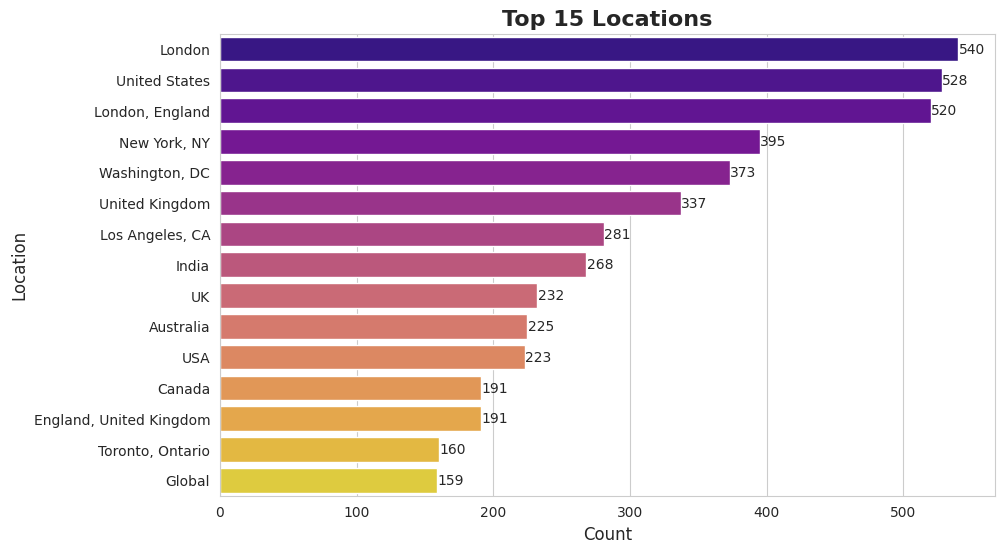

In [ ]:
plt.figure(figsize=(10, 6))
sns.set_style('whitegrid')

# Plot the countplot
sns.countplot(y='Location', data=df, order=df['Location'].value_counts().iloc[:15].index, palette='plasma')

plt.title('Top 15 Locations', fontsize=16, fontweight='bold')
plt.xlabel('Count', fontsize=12)
plt.ylabel('Location', fontsize=12)

# Add count labels to the bars
for index, value in enumerate(df['Location'].value_counts().iloc[:15]):
    plt.text(value + 10, index, value, ha='center', va='center', fontsize=10)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()


In [ ]:
import pandas as pd
import plotly.graph_objects as go

# Creating dataframe for location
location = pd.DataFrame(df['Location'].value_counts().sort_values(ascending=False))
location = location.rename(columns={'Location': 'count'})

# Plotting the interactive pie plot in percentage of Top 15 locations
data = {
    "values": location['count'][:15],
    "labels": location.index[:15],
    "domain": {"column": 0},
    "name": "Location Name",
    "hoverinfo": "label+percent+name",
    "hole": 0.4,
    "type": "pie",
    "marker": {
        "colors": ['Spectral']*15
    }
}

layout = go.Layout(
    title="<b>Percentage of Location</b>",
    legend=dict(x=0.1, y=1.0, orientation="v")
)

data = [data]
fig = go.Figure(data=data, layout=layout)
fig.update_layout(title_x=0.5)

fig.show()


The pie chart visually represents the distribution of tweets across different locations, highlighting the relative prominence and diversity of geographic perspectives within the dataset.

##Tweet Date

In [ ]:
# Count value of TweetAt (Tweeting date)
df['TweetAt'].value_counts()

20-03-2020    3448
19-03-2020    3215
25-03-2020    2979
18-03-2020    2742
21-03-2020    2653
22-03-2020    2114
23-03-2020    2062
17-03-2020    1977
08-04-2020    1881
07-04-2020    1843
06-04-2020    1742
24-03-2020    1480
09-04-2020    1471
13-04-2020    1428
26-03-2020    1277
05-04-2020    1131
10-04-2020    1005
02-04-2020     954
11-04-2020     909
03-04-2020     810
12-04-2020     803
04-04-2020     767
16-03-2020     656
01-04-2020     630
27-03-2020     345
31-03-2020     316
14-04-2020     284
29-03-2020     125
30-03-2020      87
28-03-2020      23
Name: TweetAt, dtype: int64

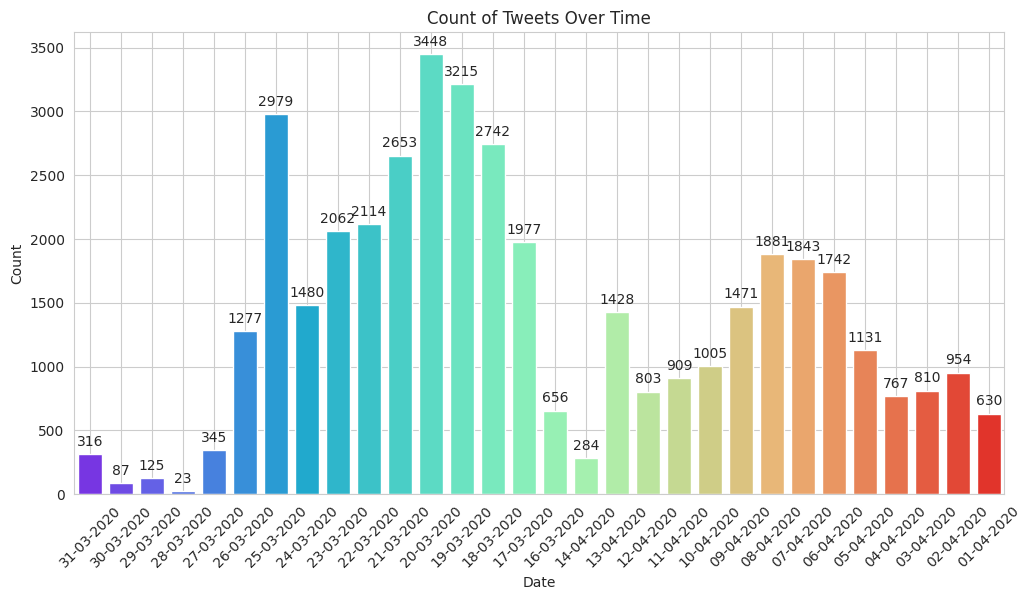

In [ ]:
# Sort the DataFrame by the 'TweetAt' column in descending order
df = df.sort_values(by='TweetAt', ascending=False)

# Plot the count distribution over time using a countplot with rainbow color palette
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='TweetAt', data=df, palette='rainbow')

# Add count labels to the top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 9), textcoords='offset points')

plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Count of Tweets Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()



The Countplot represents the number of tweets related to COVID-19 on different dates. It spans from March 16, 2020, to April 14, 2020. The count of tweets on a particular day indicates the level of activity or engagement on social media platforms regarding COVID-19 during that period.

From the data, we can observe that there was a significant surge in tweet activity around mid to late March 2020, with peak counts on March 20 and March 19, where 3,448 and 3,215 tweets were posted, respectively. This suggests that there was heightened public interest and discussion surrounding the COVID-19 situation during that time.

After the peak, tweet counts gradually decreased but remained relatively high until the beginning of April. It is worth noting that there were notable spikes on March 25, 2020 (2,979 tweets) and April 8, 2020 (1,881 tweets), indicating certain events or developments related to COVID-19 that garnered attention.

Towards the end of the data period, tweet counts significantly dropped, reaching their lowest point on April 14, 2020, with only 284 tweets. This decline could be attributed to various factors, such as a shift in public interest or the availability of alternative communication channels.



##Sentiment

In [ ]:
# Describing the sentiments
df.Sentiment.describe()

count        41157
unique           5
top       Positive
freq         11422
Name: Sentiment, dtype: object

In [ ]:
# Copying the dataframe
df2 = df.copy()

Class Distribution of Each Sentiment Type

In [ ]:
# Creating the new column 'duplicated_tweet' for analysing sentiment class type.
df2['duplicated_tweet'] = df2.OriginalTweet
df2["duplicated_tweet"] = df2["duplicated_tweet"].astype(str)

# Calculating the text count
class_df = df2.groupby('Sentiment').count()['duplicated_tweet'].reset_index().sort_values(by='duplicated_tweet',ascending=False)
class_df.style.background_gradient(cmap='viridis')

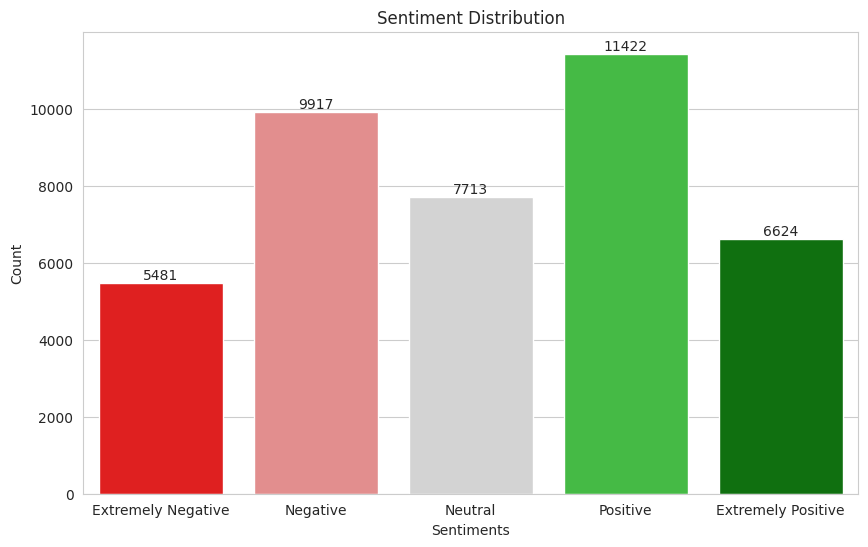

In [ ]:
# Define the custom color palette
colors = ['red', 'lightcoral', 'lightgrey', 'limegreen', 'green']

# Plot the countplot with the custom color palette
plt.figure(figsize=(10, 6))
splot = sns.countplot(x='Sentiment', data=df, order=['Extremely Negative', 'Negative', 'Neutral', 'Positive', 'Extremely Positive'], palette=colors)

# Add count annotations to the bars
for p in splot.patches:
    height = p.get_height()
    splot.annotate(format(height, '.0f'), (p.get_x() + p.get_width() / 2., height), ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=10)

plt.title('Sentiment Distribution')
plt.xlabel('Sentiments')
plt.ylabel('Count')

plt.show()


The Sentiment column reveals interesting insights about people's opinions and emotions surrounding the pandemic. The dataset consists of sentiments classified into five categories: **Positive**, **Negative**, **Neutral**, **Extremely** **Positive**, and **Extremely Negative**.

One notable finding is that the majority of sentiments expressed in the tweets lean towards positivity. With a count of 11,422 occurrences, positive sentiments are the most prevalent in the dataset. This suggests that many individuals are sharing positive experiences, thoughts, or perspectives related to COVID-19 on social media.

On the other hand, negative sentiments are also quite prominent, with 9,917 occurrences. This indicates that a significant number of tweets express negative emotions, concerns, or frustrations regarding the pandemic. It highlights the challenges, difficulties, or negative impacts experienced by individuals during this time.

The dataset also includes a substantial count of neutral sentiments, with 7,713 occurrences. These tweets likely convey a lack of strong emotion or a neutral stance towards COVID-19, indicating a balanced or objective view.

Furthermore, there is a notable presence of extremely positive sentiments, with 6,624 occurrences. These tweets likely convey an exceptionally optimistic and positive outlook on the situation, showcasing instances of hope, resilience, or positive experiences related to COVID-19.

Lastly, the dataset includes 5,481 occurrences of extremely negative sentiments. These tweets likely express intense negativity, frustration, or despair towards the pandemic, emphasizing the significant impact it has had on individuals' lives.

In summary, the sentiment analysis of the COVID-19 tweet dataset reveals a mix of positive, negative, neutral, extremely positive, and extremely negative sentiments. While positive sentiments dominate the dataset, negative and neutral sentiments are also prominent, reflecting the diverse range of emotions and opinions expressed by individuals regarding the pandemic.

#Number of characters of each sentiments types

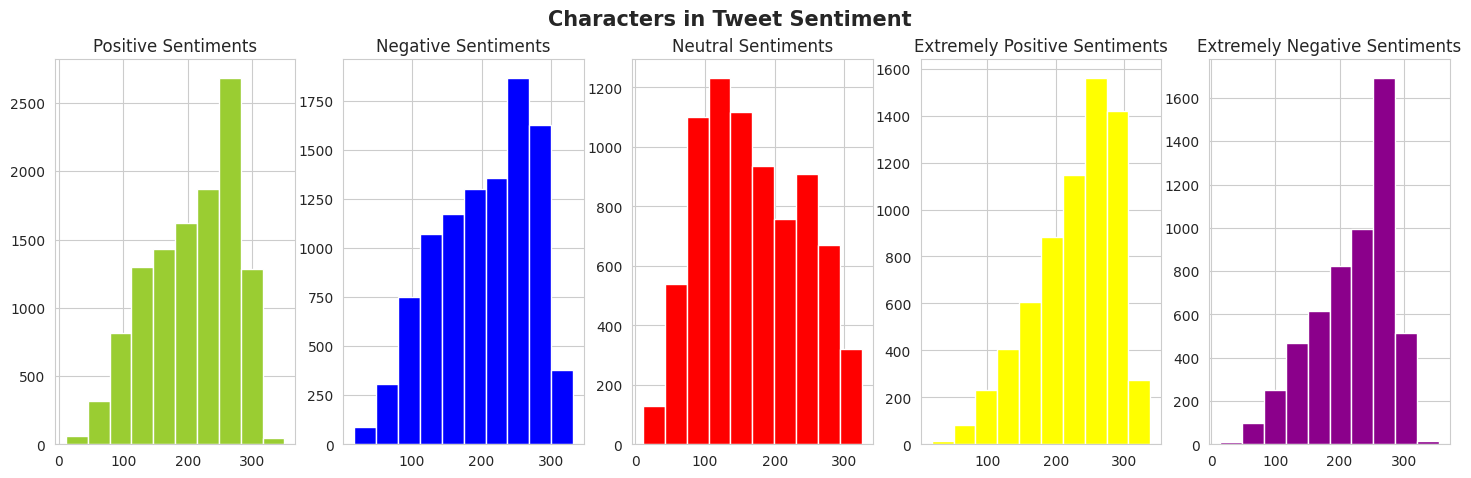

In [ ]:
# Plotting the number of characters for each tweet sentiment type
fig, axes = plt.subplots(1, 5, figsize=(18, 5))
sentiments = ["Positive", "Negative", "Neutral", "Extremely Positive", "Extremely Negative"]
colors = ['yellowgreen', 'blue', 'red', 'yellow', 'darkmagenta']

for i, ax in enumerate(axes):
    sentiment = sentiments[i]
    tweet_len = df2[df2['Sentiment'] == sentiment]['duplicated_tweet'].str.len()
    ax.hist(tweet_len, color=colors[i])
    ax.set_title(sentiment + " Sentiments")

fig.suptitle("Characters in Tweet Sentiment", size=15, fontweight="bold")

# Showing the plot
plt.show()



Analyzing the distribution of tweet lengths across sentiment categories through histogram plots provides valuable insights into how people express their emotions and opinions about COVID-19 within the limited space of a tweet. By exploring the relationship between sentiment and tweet length, we gain a deeper understanding of the nature of online discourse during a global crisis.

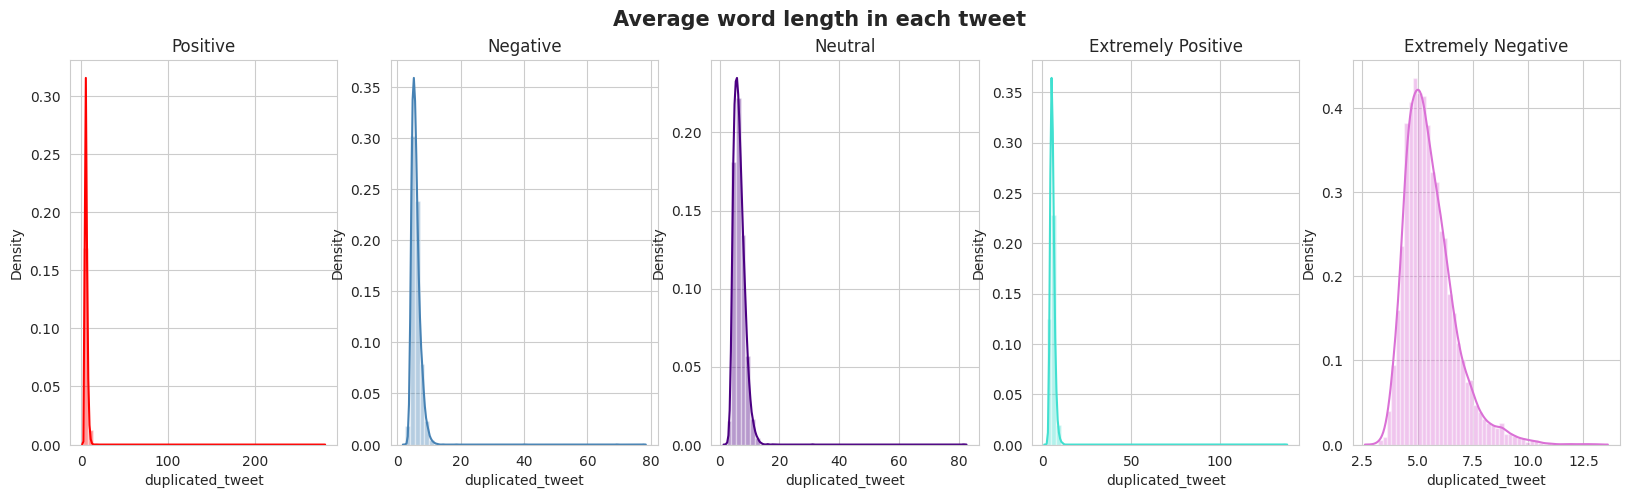

In [ ]:
# Finding the average word length in each tweet sentiment type
fig, axes = plt.subplots(1, 5, figsize=(20, 5))
sentiments = ["Positive", "Negative", "Neutral", "Extremely Positive", "Extremely Negative"]
colors = ['red', 'steelblue', 'indigo', 'turquoise', 'orchid']

for i, ax in enumerate(axes):
    sentiment = sentiments[i]
    word = df2[df2['Sentiment'] == sentiment]['duplicated_tweet'].str.split().apply(lambda x: [len(i) for i in x])
    sns.distplot(word.map(lambda x: np.mean(x)), ax=ax, color=colors[i])
    ax.set_title(sentiment)

fig.suptitle('Average word length in each tweet', size=15, fontweight="bold")

# Showing the Plot
plt.show()


The resulting plot shows the distribution of average word lengths for each sentiment category. This visualization provides insights into how the average word length varies among different sentiments. It helps to identify whether tweets expressing certain sentiments tend to have longer or shorter words, and whether there are any notable differences in word length distributions across sentiment categories in the COVID-19 tweet dataset.

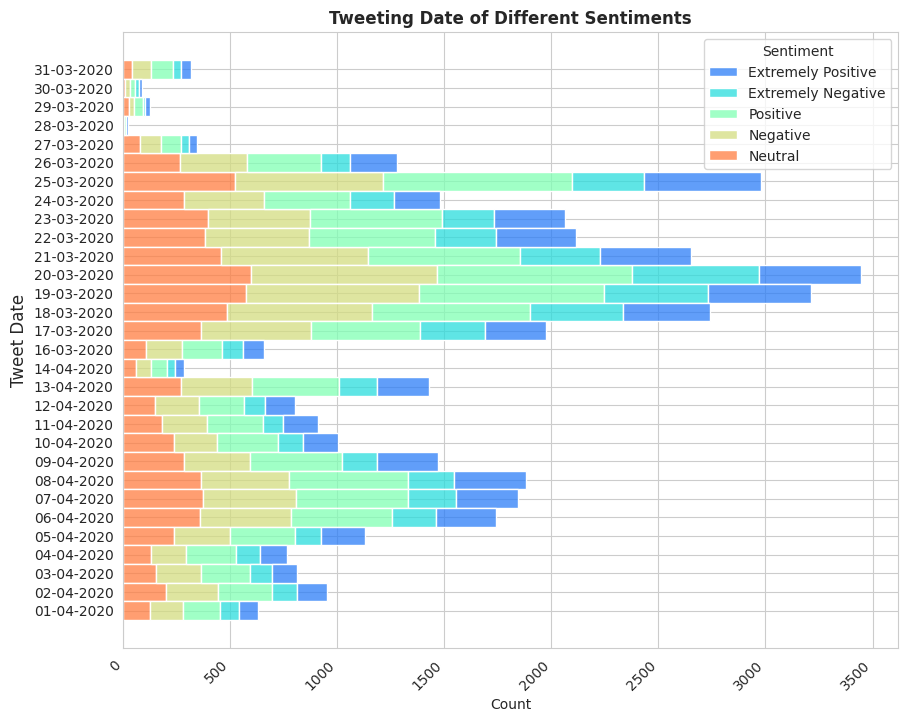

In [ ]:
# Plotting Tweet date with different sentiments
plt.figure(figsize=(10, 8))
palette = "rainbow"
sns.histplot(data=df2, y="TweetAt", hue="Sentiment", multiple="stack", palette=palette)
plt.xticks(rotation=45, ha='right')
plt.title("Tweeting Date of Different Sentiments", fontweight='bold')
plt.ylabel("Tweet Date", fontsize=12)
plt.show()


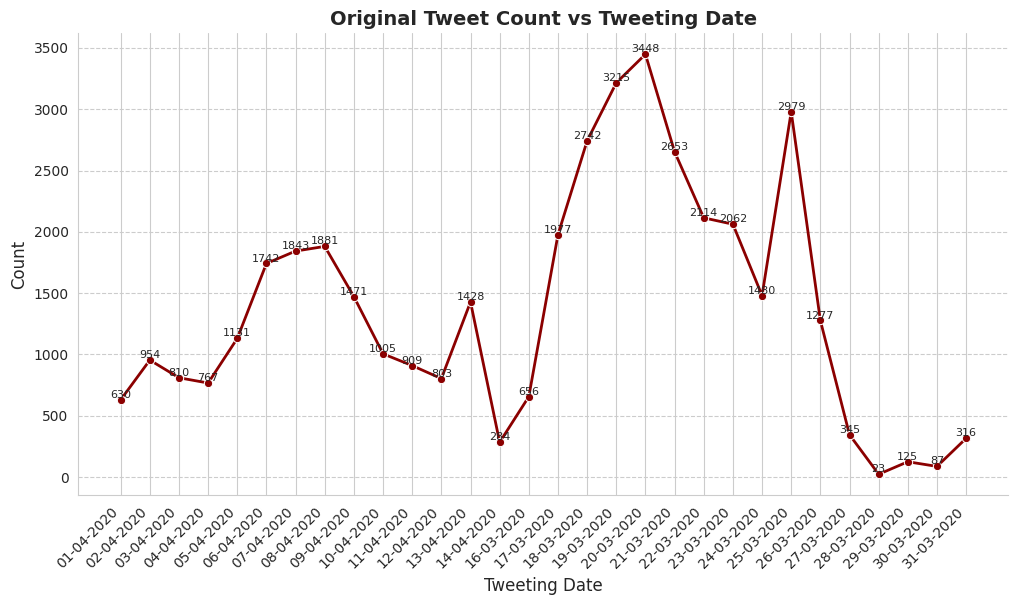

In [ ]:
plt.figure(figsize=(12, 6))

# Grouping the data and plotting the line plot
grp_tweetAt = df2.groupby('TweetAt').count()['OriginalTweet']
sns.lineplot(data=grp_tweetAt, marker='o', markersize=6, color='darkred', linewidth=2)

# Customizing the plot
plt.xlabel('Tweeting Date', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Original Tweet Count vs Tweeting Date', fontweight='bold', fontsize=14)

# Adjusting the tick labels
plt.xticks(rotation=45, ha='right')

# Removing the spines (borders) of the plot
sns.despine()

# Adding gridlines
plt.grid(axis='y', linestyle='--')

# Adding data labels
for x, y in zip(grp_tweetAt.index, grp_tweetAt.values):
    plt.text(x, y, str(y), ha='center', va='bottom', fontsize=8)

plt.show()


By observing the general shape of the line plot, we can identify trends in tweet activity. The data suggests that there were initial increases in tweet counts, followed by fluctuations and occasional spikes. These trends indicate evolving discussions and changing levels of engagement over time as the pandemic unfolded.

##Punctuations in the column Sentiment.

Removing punctuation from a dataset in sentiment analysis is important for:


*   Noise reduction: Punctuation marks don't contribute much to sentiment, so removing them reduces noise and helps focus on essential words.
*   Standardization: Punctuation varies across languages and styles, so removing it ensures consistent treatment of phrases.
*   Tokenization: Punctuation can interfere with tokenization, creating unnecessary tokens or affecting their meaning.
*   Simplification: Removing punctuation simplifies the text, allowing better sentiment analysis by focusing on sentiment-bearing words.



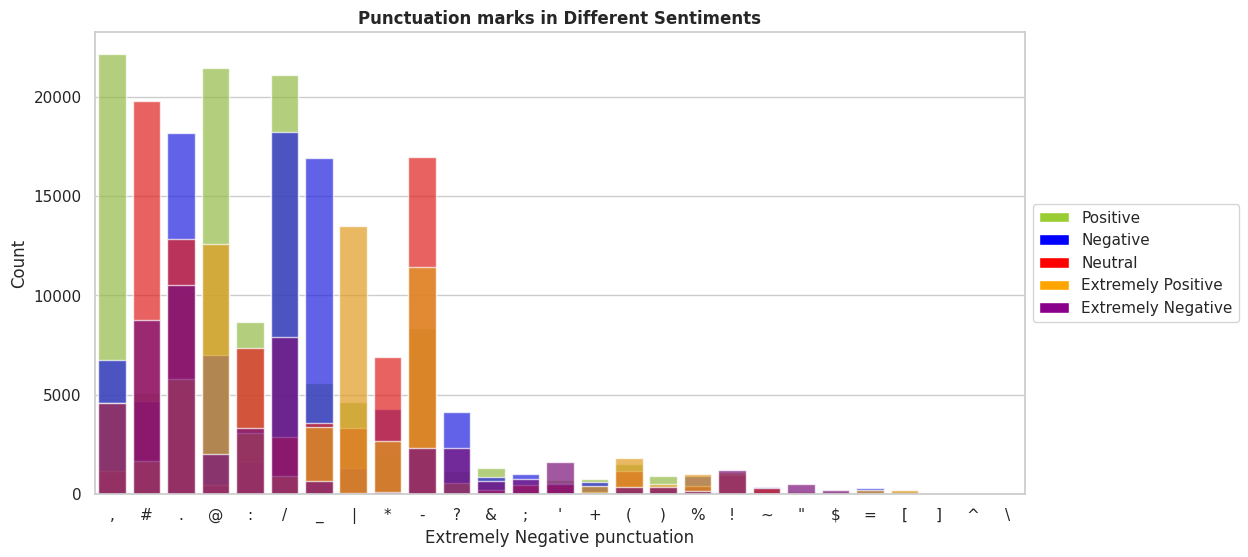

In [ ]:
import string
import matplotlib.pyplot as plt
from collections import defaultdict
import seaborn as sns
from matplotlib.patches import Patch

sentiments = ["Positive", "Negative", "Neutral", "Extremely Positive", "Extremely Negative"]
colors = ['yellowgreen', 'blue', 'red', 'orange', 'darkmagenta']

# Creating the corpus from the sentiment & duplicated_tweet column and appending them
def create_corpus(target):
    corpus = []

    for x in df2[df2['Sentiment'] == target]['duplicated_tweet'].str.split():
        for i in x:
            corpus.append(i)
    return corpus

# Function to plot punctuation marks for a given sentiment
def plot_punctuation(sentiment, color):
    corpus = create_corpus(sentiment)
    dic = defaultdict(int)
    special = string.punctuation

    for sentence in corpus:
        for char in sentence:
            if char in special:
                dic[char] += 1

    if len(dic) == 0:
        print("No punctuation marks found for", sentiment, "Sentiment")
        return

    x, y = zip(*dic.items())

    plt.figure(figsize=(10, 5))
    plt.bar(x, y, color=color)
    plt.xlabel('Punctuations')
    plt.title('Punctuation marks in ' + sentiment + ' Sentiment', fontweight='bold')
    plt.show()

# Creating the collection for each sentiment having different punctuation marks and plotting
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

handles = []

for sentiment, color in zip(sentiments, colors):
    corpus = create_corpus(sentiment)
    dic = defaultdict(int)
    special = string.punctuation

    for sentence in corpus:
        for char in sentence:
            if char in special:
                dic[char] += 1

    if len(dic) == 0:
        print("No punctuation marks found for", sentiment, "Sentiment")
        continue

    x, y = zip(*dic.items())

    ax = sns.barplot(x=list(x), y=list(y), color=color, alpha=0.7)
    ax.set(xlabel=sentiment + ' punctuation', ylabel='Count')
    plt.title('Punctuation marks in Different Sentiments', fontweight='bold')

    # Add the handle (patch) with the color and label to the list
    handles.append(Patch(facecolor=color, label=sentiment))

# Adding the legend with the color-assigned patches
plt.legend(handles=handles, loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()


##Data Preprocessing

 Removing *'@user'* from Original Tweets.

Removing "@user" mentions from tweets for sentiment analysis is beneficial because it:


*   Protects anonymity and privacy.
*   Reduces noise by focusing on the sentiment-carrying text.
*   Ensures standardized treatment of phrases and mentions.
*   Improves accuracy by analyzing the tweet's sentiment independently.

However, removing "@user" mentions may result in the loss of contextual information, so it's important to consider the specific requirements and goals of the sentiment analysis task.

In [ ]:
# df3 = df.copy()

In [ ]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i,'',input_txt)
    return input_txt

In [ ]:
import re

df['Cleaned_Tweet'] = df['OriginalTweet'].apply(lambda x: re.sub('@\w+', '', x))


In [ ]:
# username = 37080
# df[df['UserName'] == username]

Removing HTTP and URL from 'Cleaned_Tweet'.

Removing URLs and HTTP references from original tweets in sentiment analysis can be advantageous for several reasons:

* Noise reduction: URLs and HTTP references typically do not contribute to the sentiment or content of the tweet. By removing them, you reduce unnecessary noise in the dataset, allowing the sentiment analysis algorithm to focus on the text that carries sentiment.

* Standardization: URLs can vary in structure, length, and content. Removing them helps standardize the text and ensures consistent treatment of tweets, particularly when training sentiment analysis models that handle tweets from diverse sources.

* Tokenization and analysis: URLs and HTTP references can interfere with the tokenization process, resulting in the creation of unnecessary tokens or affecting the meaning of individual tokens. Removing them allows for better tokenization and accurate sentiment analysis by focusing on sentiment-bearing words and phrases.

* Privacy considerations: URLs may contain personal or sensitive information. Removing them helps protect the privacy of individuals mentioned in the tweets and prevents the inadvertent exposure of confidential data.

  




In [ ]:
import re

df['Cleaned_Tweet'] = df['Cleaned_Tweet'].apply(lambda x: re.sub(r'http\S+|www.\S+', '', str(x)))


In [ ]:
df.sample()

UserName  ScreenName      Location     TweetAt  \
37048     40847       85799  New York, NY  10-04-2020   

                                                                                                                                                                                       OriginalTweet  \
37048  The market doesn t care about our health in the long run it cares about share prices an hour from now Stockpiling ventilators for a rare pandemic is against everything the market stands for   

                Sentiment  \
37048  Extremely Positive   

                                                                                                                                                                                       Cleaned_Tweet  
37048  The market doesn t care about our health in the long run it cares about share prices an hour from now Stockpiling ventilators for a rare pandemic is against everything the market stands for

Removing Punctuations, Numbers, and Special Characters from 'Cleaned_Tweet'.

In [ ]:
# removing special characters, numbers, punctuations.

df['Cleaned_Tweet'] = df['Cleaned_Tweet'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))

In [ ]:
df.sample()

UserName  ScreenName Location     TweetAt  \
20363     24162       69114      NaN  25-03-2020   

                                                                    OriginalTweet  \
20363    Soap vs hand sanitizer What is it Professor explains what best kills the   

      Sentiment  \
20363  Positive   

                                                                    Cleaned_Tweet  
20363    Soap vs hand sanitizer What is it Professor explains what best kills the

Removing punctuations, numbers, and special characters from 'Cleaned_Tweet' is done for noise reduction, tokenization improvement, standardization, and simplification in sentiment analysis. However, it may result in some information loss, and sentiment analysis models focus more on content words for sentiment classification.

**Removing Short Words from 'Cleaned Tweet'.**

In [ ]:
def clean_tweet(tweet):
    words = tweet.split()
    cleaned_words = [w for w in words if len(w) > 2]
    cleaned_tweet = ' '.join(cleaned_words)
    return cleaned_tweet

df['Cleaned_Tweet'] = df['Cleaned_Tweet'].apply(clean_tweet)

In [ ]:
df.sample()

UserName  ScreenName                  Location     TweetAt  \
29240     33039       77991  Between heart and home.   05-04-2020   

                                                                                                                                                                                                 OriginalTweet  \
29240  The fear of #Covid_19 witnessed live today.\r\r\nWent for grocery shopping and even though the store was crowded, every single person and I mean EVERY SINGLE PERSON was trying to maintain social d...   

      Sentiment  \
29240  Negative   

                                                                                                                                                                                                 Cleaned_Tweet  
29240  The fear Covid witnessed live today Went for grocery shopping and even though the store was crowded every single person and mean EVERY SINGLE PERSON was trying maintain social distancing The fear ...

Removing short words in sentiment analysis is beneficial for noise reduction, improved feature selection, and computational efficiency.

**Removing stopwords**.

Removing stop words in sentiment analysis can be advantageous for several reasons:

* Noise reduction: Stop words, such as "the," "is," and "and," are commonly used words in a language that typically do not carry significant sentiment or meaning. By removing them, you reduce noise in the dataset, allowing the sentiment analysis algorithm to focus on more meaningful and sentiment-rich words.

* Improved feature selection: Stop words occur frequently in texts, and their removal can help prioritize words that are more discriminative in expressing sentiment. By excluding common stop words, sentiment analysis models can give more weight to content words that carry stronger sentiment signals.

* Computational efficiency: Removing stop words reduces the overall number of words in the dataset, which can lead to faster computation and processing times, particularly when working with large datasets.

In [ ]:
# Downloading stopwords library
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords

# Download the stopwords if not already downloaded
nltk.download('stopwords')

# Extracting the stopwords from the nltk library
sw = stopwords.words('english')

# Displaying the stopwords
print(np.array(sw))


['i' 'me' 'my' 'myself' 'we' 'our' 'ours' 'ourselves' 'you' "you're"
 "you've" "you'll" "you'd" 'your' 'yours' 'yourself' 'yourselves' 'he'
 'him' 'his' 'himself' 'she' "she's" 'her' 'hers' 'herself' 'it' "it's"
 'its' 'itself' 'they' 'them' 'their' 'theirs' 'themselves' 'what' 'which'
 'who' 'whom' 'this' 'that' "that'll" 'these' 'those' 'am' 'is' 'are'
 'was' 'were' 'be' 'been' 'being' 'have' 'has' 'had' 'having' 'do' 'does'
 'did' 'doing' 'a' 'an' 'the' 'and' 'but' 'if' 'or' 'because' 'as' 'until'
 'while' 'of' 'at' 'by' 'for' 'with' 'about' 'against' 'between' 'into'
 'through' 'during' 'before' 'after' 'above' 'below' 'to' 'from' 'up'
 'down' 'in' 'out' 'on' 'off' 'over' 'under' 'again' 'further' 'then'
 'once' 'here' 'there' 'when' 'where' 'why' 'how' 'all' 'any' 'both'
 'each' 'few' 'more' 'most' 'other' 'some' 'such' 'no' 'nor' 'not' 'only'
 'own' 'same' 'so' 'than' 'too' 'very' 's' 't' 'can' 'will' 'just' 'don'
 "don't" 'should' "should've" 'now' 'd' 'll' 'm' 'o' 're' 've' 'y'

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def remove_stopwords(words):
  ''' function to remove stopwords'''
  # make words lowercase and then remove stopwords
  words = [word.lower() for word in words.split() if word.lower() not in sw]

  # join the list of words with a space separator
  return " ".join(words)


In [ ]:
df['Cleaned_Tweet'] = df['Cleaned_Tweet'].apply(remove_stopwords)

In [ ]:
df.sample()

UserName  ScreenName       Location     TweetAt  \
22911     26710       71662  Las Vegas, NV  25-03-2020   

                                                                                                                                                         OriginalTweet  \
22911  If soap and water are not available, use an alcohol-based sanitizer that contains at least 60% alcohol \r\r\n\r\r\n#COVID2019 #Coronavirus #CoronavirusLockdown   

      Sentiment  \
22911   Neutral   

                                                                                                      Cleaned_Tweet  
22911  soap water available use alcoholbased sanitizer contains least alcohol covid coronavirus coronaviruslockdown

**Tokenization**

Tokenization in sentiment analysis refers to the process of breaking down a text into individual units, called tokens. These tokens can be words, phrases, or even subwords, depending on the chosen tokenization strategy. Tokenization plays a crucial role in sentiment analysis as it forms the basis for analyzing the sentiment conveyed by each individual unit.

In [ ]:
# create new variable tokenized tweet
tokenized_tweet = df['Cleaned_Tweet'].apply(lambda x: x.split())

In [ ]:
df.sample()

UserName  ScreenName Location     TweetAt  \
26897     30696       75648      NaN  02-04-2020   

                                                                                                                                                                                                 OriginalTweet  \
26897  Can u impose retail store regulations more specifically GROCERY stores to have their Âessential employeesÂ fitted with gloves and face masks and sterilize their steel carts on which Covid 19 rem...   

      Sentiment  \
26897  Positive   

                                                                                                                                                               Cleaned_Tweet  
26897  impose retail store regulations specifically grocery stores essential employees fitted gloves face masks sterilize steel carts covid remains alive days askgovwhitmer

**Stemming**

Stemming in sentiment analysis refers to the process of reducing words to their base or root form, known as the stem. The purpose of stemming is to normalize the words in a text by removing suffixes or prefixes, thereby reducing different word variations to a common form.

In [ ]:
from nltk.stem.snowball import SnowballStemmer

# Create an object of the stemming function
stemmer = SnowballStemmer("english")

def stemming(words):
    '''A function which stems each word in the given text'''
    words = [stemmer.stem(word) for word in words.split()]
    return " ".join(words)

# Apply stemming to the 'Cleaned_Tweet' column in the DataFrame
df['Cleaned_Tweet'] = df['Cleaned_Tweet'].apply(stemming)


In [ ]:
df.head()

UserName  ScreenName              Location     TweetAt  \
25320     29119       74071                    ??  31-03-2020   
25289     29088       74040        Nairobi, Kenya  31-03-2020   
25282     29081       74033                   NaN  31-03-2020   
25283     29082       74034  Amsterdam, Nederland  31-03-2020   
25284     29083       74035      Maggie Valley NC  31-03-2020   

                                                                                                                                                                                                 OriginalTweet  \
25320  BREAKING: Help the Hungry: The food charities that need volunteers to get supplies to neighbours: 'The big change is the financial hardship we're seeing Â and the huge level of demand,' says char...   
25289  @The_wakandah @xtiandela Would you rather die of corona or hunger??think about the people in the slums or millions of Kenyans who can't afford food to stock. If the government will offer free food...   
25282  Unfortunately, fraudsters are finding ways to take advantage of #coronavirus fears. @ABABankers shares valuable insights and tips to avoid coronavirus scams so you can protect your money: https://...   
25283  Norwegian Sovereign Wealth Fund doubles its shares in Shell   Yes share prices are low but they are likely to stay low Already prior to 19 amp oil price war the oil amp gas sector was showing sign...   
25284  The first batch of #MaggieValley distiller @ElevatedMtn's hand sanitizer was picked up by Haywood County emergency services dep't earlier today. #Haywd #coronavirus #Covid19 #WNCnews https://t.co/...   

                Sentiment  \
25320  Extremely Positive   
25289  Extremely Positive   
25282  Extremely Negative   
25283  Extremely Negative   
25284            Positive   

                                                                                                                                                               Cleaned_Tweet  
25320                      break help hungri food chariti need volunt get suppli neighbour big chang financi hardship see huge level demand say chariti boss coronavirus via  
25289                            would rather die corona hungerthink peopl slum million kenyan cant afford food stock govern offer free food finebut wont lockdown jus anoth  
25282                                        unfortun fraudster find way take advantag coronavirus fear share valuabl insight tip avoid coronavirus scam protect money covid  
25283  norwegian sovereign wealth fund doubl share shell yes share price low like stay low alreadi prior amp oil price war oil amp gas sector show sign perman declin forgot  
25284                                          first batch maggievalley distil hand sanit pick haywood counti emerg servic dept earlier today haywd coronavirus covid wncnew

##Story Generation and Visualization from Tweets


**Hashtags on Tweet Sentiments**.

In [ ]:
# Using function to collect hashtags
def hashtag_extract(x):
    hashtags = []
    for i in x:
        ht = re.findall(r'#(\w+)', i)
        hashtags.append(ht)
    return hashtags

In [ ]:
# Extracting hashtags from different tweets as per sentiments
Htg_Extremely_Positive = hashtag_extract(df['OriginalTweet'][df['Sentiment'] == 'Extremely Positive'])
Htg_Positive = hashtag_extract(df['OriginalTweet'][df['Sentiment'] == 'Positive'])
Htg_Neutral = hashtag_extract(df['OriginalTweet'][df['Sentiment'] == 'Neutral'])
Htg_Negative = hashtag_extract(df['OriginalTweet'][df['Sentiment'] == 'Negative'])
Htg_Extremely_Negative = hashtag_extract(df['OriginalTweet'][df['Sentiment'] == 'Extremely Negative'])

In [ ]:
# Unnesting list
Htg_Extremely_Positive = sum(Htg_Extremely_Positive, [])
Htg_Positive = sum(Htg_Positive, [])
Htg_Neutral = sum(Htg_Neutral, [])
Htg_Negative = sum(Htg_Negative,[])
Htg_Extremely_Negative = sum(Htg_Extremely_Negative,[])

In [ ]:
# Printing the result
print("Hashtag Extremely Positive Words : ", Htg_Extremely_Positive)
print("Hashtag Positive Words : ", Htg_Positive)
print("Hashtag Neutral Words : ", Htg_Neutral)
print("Hashtag Negative Words : ", Htg_Negative)
print("Hashtag Extremely Negative Words : ", Htg_Extremely_Negative)

Hashtag Extremely Positive Words :  ['Coronavirus', 'coronavirus', 'Switzerland', 'coffee', 'foodsupply', 'foodsafety', 'coronavirus', 'covid19', 'Coronavirus', 'COVID19', 'NHS', 'Coronavirus', 'Covid19', 'saveourgrowers', 'coronavirus', 'growyourown', 'coronavirus', 'CoronaVirus', 'design', 'coronavirus', 'BoreDa', 'etsyshop', 'coronavirus', 'foodarmy', 'Covid_19', 'lockdown', 'FeedingTheNation', 'feedingthevulnerable', 'food', 'community', 'Quarantine', 'coronavirus', 'socialdistancing', 'London', 'food', 'onlineshopping', 'coronavirus', 'Economy', 'ConsumerConfidence', 'FedPrimeRate', 'USA', 'SoftData', 'Consumer', 'Consumers', 'Economics', 'EconomicData', 'Business', 'Spending', 'COVID19', 'COVID_19', 'Coronavirus', 'COVID19', 'COVID2019', 'COVID2019', 'PowerfulPatientPartner', 'covid19UK', 'trends', 'postpandemic', 'Coronavirus', 'retaillife', 'Coronavirus', 'BeVigilant', 'SCAMS', 'FRAUD', 'COVID19', 'CYBERSECURITY', 'SECURITY', 'PINELLAS', 'Apple', 'COVID19', 'CORONAVIRUS', 'COVI

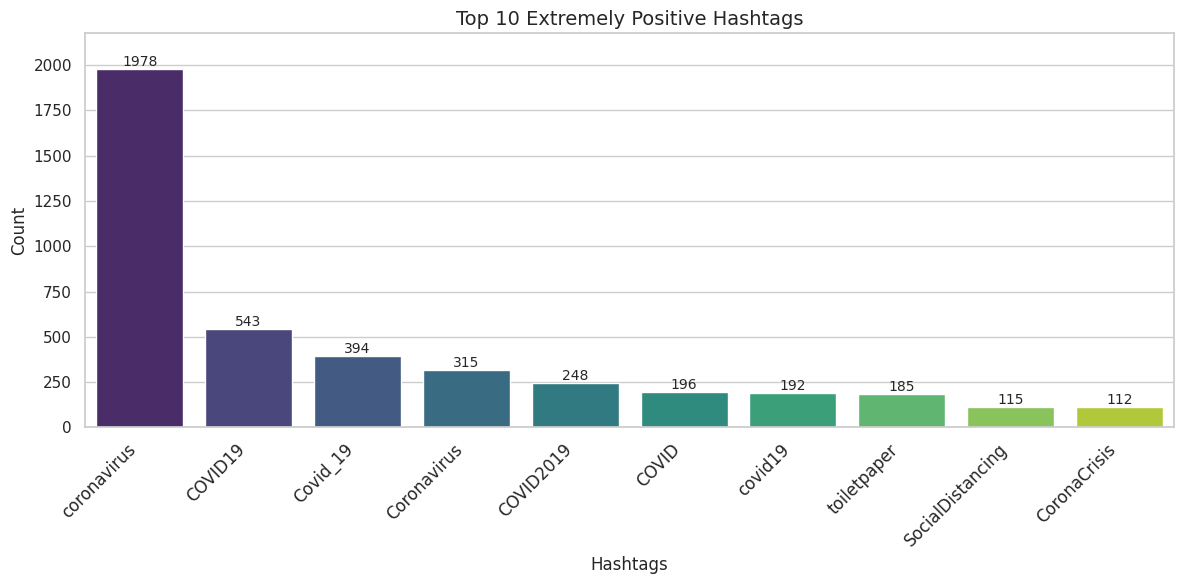

In [ ]:
# Create frequency distribution
hashtags_freq = nltk.FreqDist(Htg_Extremely_Positive)

# Create dataframe
top_hashtags = hashtags_freq.most_common(10)
d = pd.DataFrame(top_hashtags, columns=['Hashtag', 'Count'])

# Plotting the result
plt.figure(figsize=(12, 6))
sns.set(style='whitegrid')  # Set a whitegrid background style
ax = sns.barplot(data=d, x='Hashtag', y='Count', palette='viridis')

# Customizing plot aesthetics
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xlabel("Hashtags", fontsize=12)
plt.title("Top 10 Extremely Positive Hashtags", fontsize=14)
plt.ylim(top=d['Count'].max() * 1.1)  # Adjust the y-axis limit for better visualization

# Adding value labels to the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10)

plt.tight_layout()  # Improves spacing between the plot elements
plt.show()


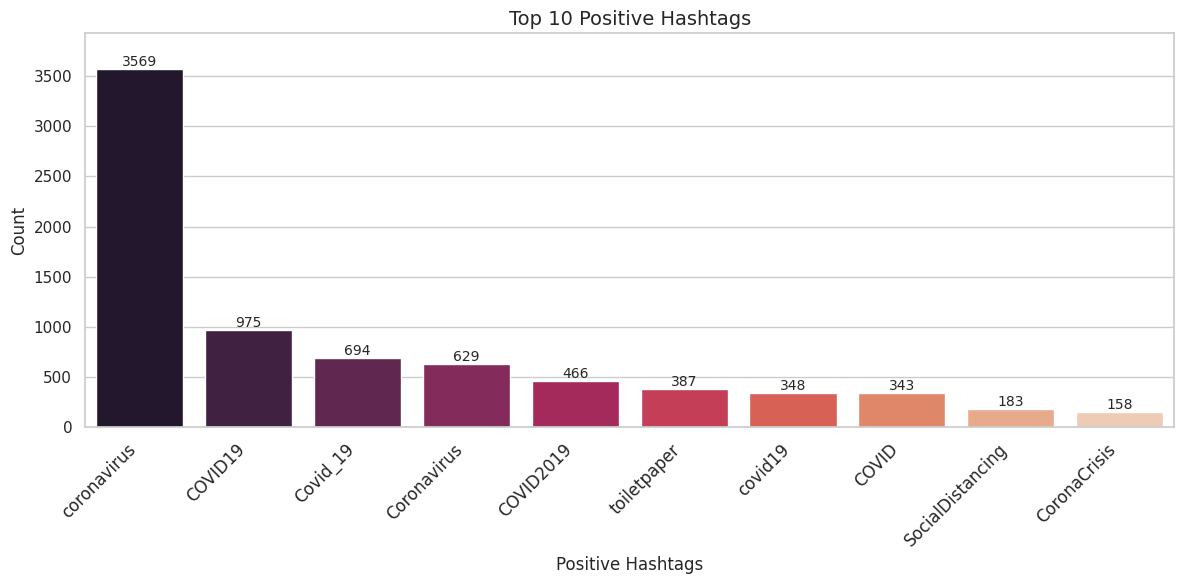

In [ ]:
# Create frequency distribution
hashtags_freq = nltk.FreqDist(Htg_Positive)

# Create dataframe
top_hashtags = hashtags_freq.most_common(10)
d = pd.DataFrame(top_hashtags, columns=['Hashtag', 'Count'])

# Plotting the result
plt.figure(figsize=(12, 6))
sns.set(style='whitegrid')  # Set a whitegrid background style
ax = sns.barplot(data=d, x='Hashtag', y='Count', palette='rocket')

# Customizing plot aesthetics
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xlabel("Positive Hashtags", fontsize=12)
plt.title("Top 10 Positive Hashtags", fontsize=14)
plt.ylim(top=d['Count'].max() * 1.1)  # Adjust the y-axis limit for better visualization

# Adding value labels to the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10)

plt.tight_layout()  # Improves spacing between the plot elements
plt.show()


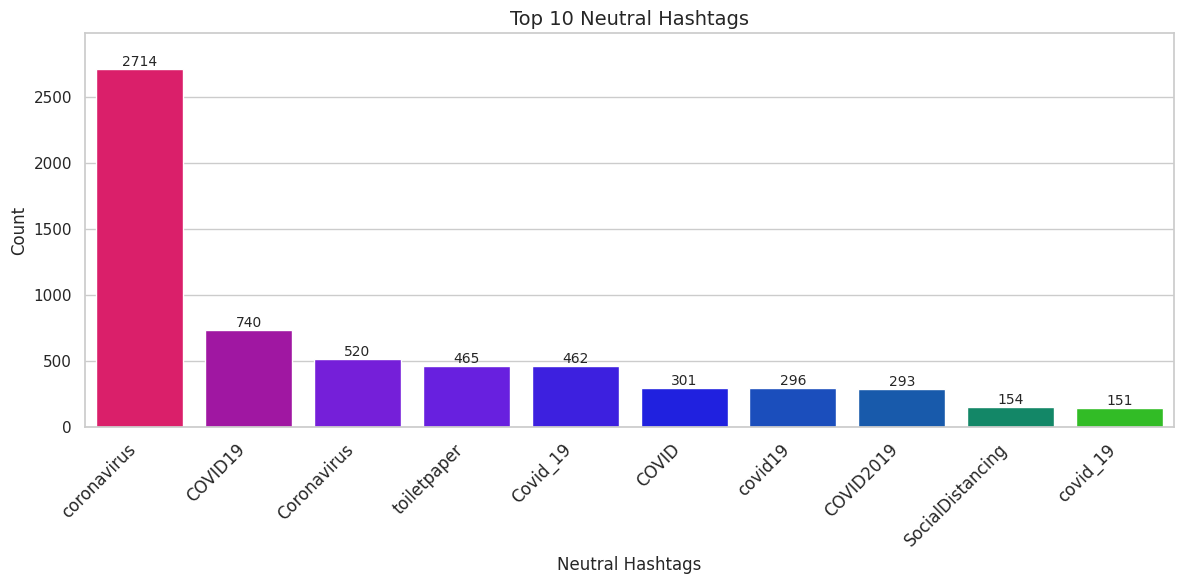

In [ ]:
# Create frequency distribution
hashtags_freq = nltk.FreqDist(Htg_Neutral)

# Create dataframe
top_hashtags = hashtags_freq.most_common(10)
d = pd.DataFrame(top_hashtags, columns=['Hashtag', 'Count'])

# Plotting the result
plt.figure(figsize=(12, 6))
sns.set(style='whitegrid')  # Set a whitegrid background style
ax = sns.barplot(data=d, x='Hashtag', y='Count', palette='prism')

# Customizing plot aesthetics
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xlabel("Neutral Hashtags", fontsize=12)
plt.title("Top 10 Neutral Hashtags", fontsize=14)
plt.ylim(top=d['Count'].max() * 1.1)  # Adjust the y-axis limit for better visualization

# Adding value labels to the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10)

plt.tight_layout()  # Improves spacing between the plot elements
plt.show()


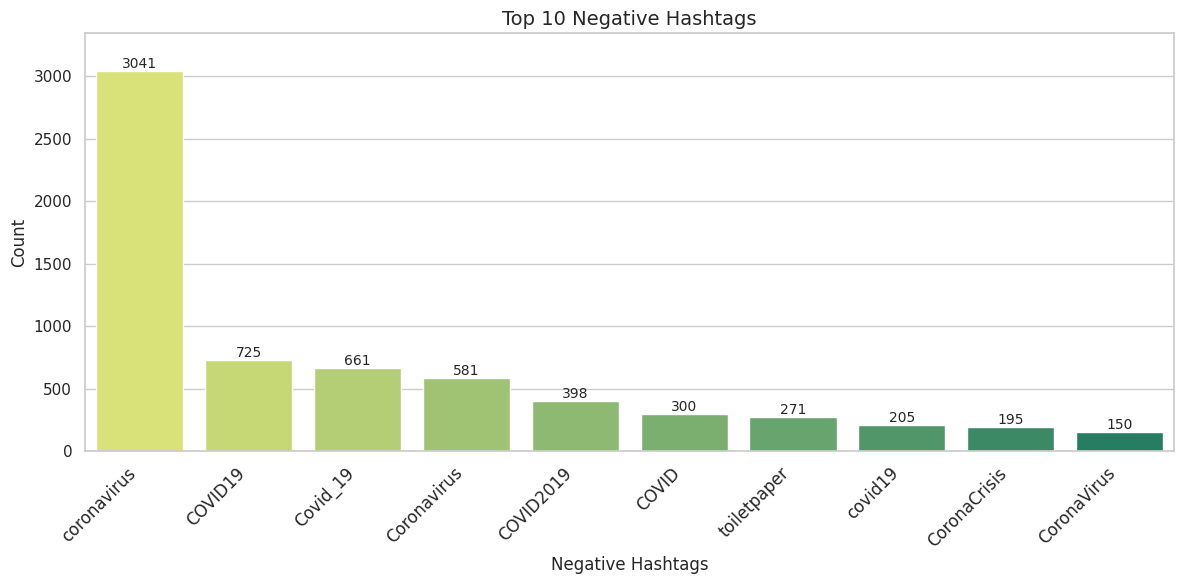

In [ ]:
# Create frequency distribution
hashtags_freq = nltk.FreqDist(Htg_Negative)

# Create dataframe
top_hashtags = hashtags_freq.most_common(10)
d = pd.DataFrame(top_hashtags, columns=['Hashtag', 'Count'])

# Plotting the result
plt.figure(figsize=(12, 6))
sns.set(style='whitegrid')  # Set a whitegrid background style
ax = sns.barplot(data=d, x='Hashtag', y='Count', palette='summer_r')

# Customizing plot aesthetics
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xlabel("Negative Hashtags", fontsize=12)
plt.title("Top 10 Negative Hashtags", fontsize=14)
plt.ylim(top=d['Count'].max() * 1.1)  # Adjust the y-axis limit for better visualization

# Adding value labels to the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10)

plt.tight_layout()  # Improves spacing between the plot elements
plt.show()


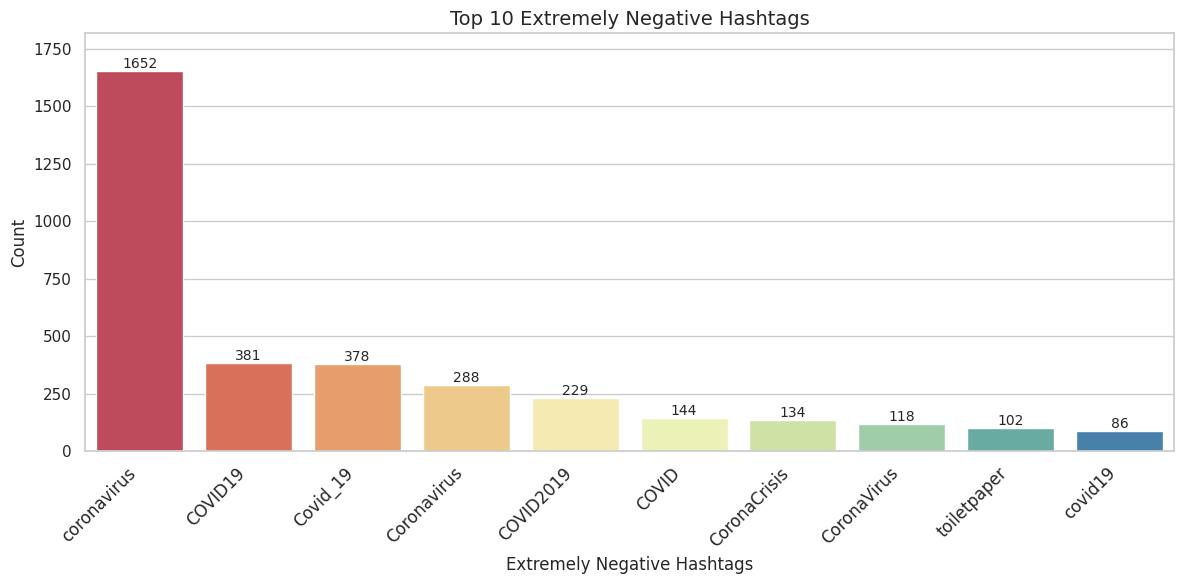

In [ ]:
# Create frequency distribution
hashtags_freq = nltk.FreqDist(Htg_Extremely_Negative)

# Create dataframe
top_hashtags = hashtags_freq.most_common(10)
d = pd.DataFrame(top_hashtags, columns=['Hashtag', 'Count'])

# Plotting the result
plt.figure(figsize=(12, 6))
sns.set(style='whitegrid')  # Set a whitegrid background style
ax = sns.barplot(data=d, x='Hashtag', y='Count', palette='Spectral')

# Customizing plot aesthetics
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xlabel("Extremely Negative Hashtags", fontsize=12)
plt.title("Top 10 Extremely Negative Hashtags", fontsize=14)
plt.ylim(top=d['Count'].max() * 1.1)  # Adjust the y-axis limit for better visualization

# Adding value labels to the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10)

plt.tight_layout()  # Improves spacing between the plot elements
plt.show()


##Extracting Features.

In [ ]:
new_df = df[['Cleaned_Tweet','Sentiment']]

The code creates a new DataFrame, new_df, with the 'Cleaned_Tweet' and 'Sentiment' columns, containing preprocessed tweet text and associated sentiment labels , respectively.

In [ ]:
new_df.sample(5)

Cleaned_Tweet  \
3265                              call volum helplin increas lead longer wait time pleas bear sorri wait date inform covid consum right see websit faq   
15533                                           went groceri store price toilet paper insan pleas stip buy covid stayathom physicaldistanc coronavirus   
18415                                           healthcar profession better get coronavirus supermarket somebodi mild simptom entub critic ill patient   
10168  continu speak food startup what weigh mind covid mani citi amp communiti go various stage lockdown upend typic consum shop behavior coronavirus   
10665                                                               enough enough time stop panic buy paramed stare shelv clear locust shift save live   

                Sentiment  
3265             Positive  
15533            Positive  
18415             Neutral  
10168             Neutral  
10665  Extremely Negative

In [ ]:
from collections import Counter
cnt = Counter()
for text in new_df.Cleaned_Tweet.values:
    for word in text.split():
        cnt[word] += 1

most_common = cnt.most_common(10)
most_common_df = pd.DataFrame(most_common, columns=['Word', 'Count'])
print(most_common_df)

          Word  Count
0        covid  21833
1  coronavirus  18022
2        price   9048
3        store   8172
4  supermarket   7731
5         food   7222
6      groceri   6737
7        peopl   5607
8       consum   5220
9         shop   5117


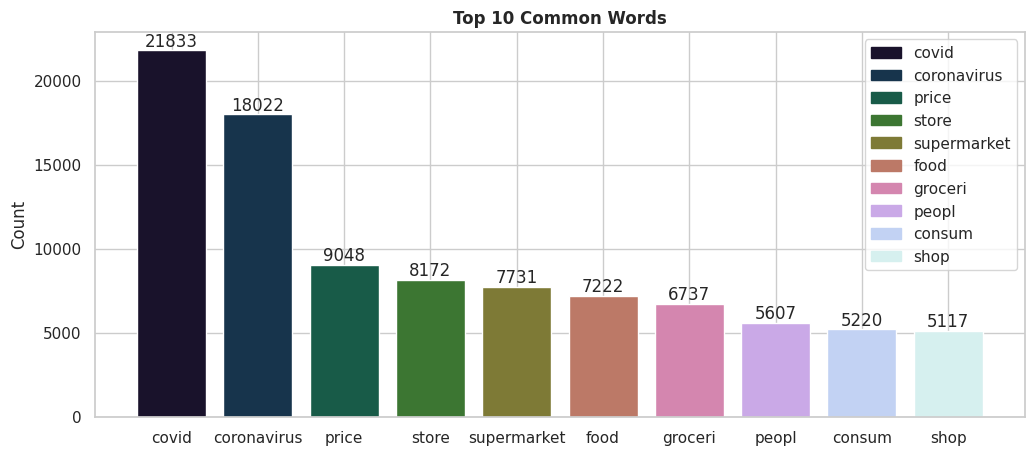

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

com = sorted(cnt.most_common(), key=lambda x: x[1], reverse=True)[:10]
x, y = zip(*com)

# Generate color palette using cubehelix style
colors = sns.color_palette("cubehelix", len(x))

plt.figure(figsize=(12, 5))
bars = plt.bar(x, y, color=colors)
plt.title('Top 10 Common Words', fontweight='bold')
plt.ylabel('Count')

# Adding count labels on top of the bars
for bar, count in zip(bars, y):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), count, ha='center', va='bottom')

# Adding custom color legend
legend_elements = [plt.Rectangle((0, 0), 1, 1, color=col) for col in colors]
plt.legend(legend_elements, x)

plt.show()



##Word Cloud

In [ ]:
# Importing the required libraries for Word Cloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
import os
from os import path

In [ ]:
# Creating new dataframe
cloud_df = df[['Cleaned_Tweet', 'Sentiment']]
cloud_df.sample(3)

Cleaned_Tweet  \
15137                                                                            want quarantin hous still need either die hunger cuz search daili consum daili coronavirus   
4210   given supermarket shelv empti inact hoard research local farm shop area farm shop butcher greengroc dairi deliv milk egg yoghurt anyth come covid support local busi   
16879                              littl strang see line mark peopl keep feet apart line groceri store well done much appreci socialdistanc coronavirus covid mondaythought   

                Sentiment  
15137  Extremely Negative  
4210              Neutral  
16879            Positive

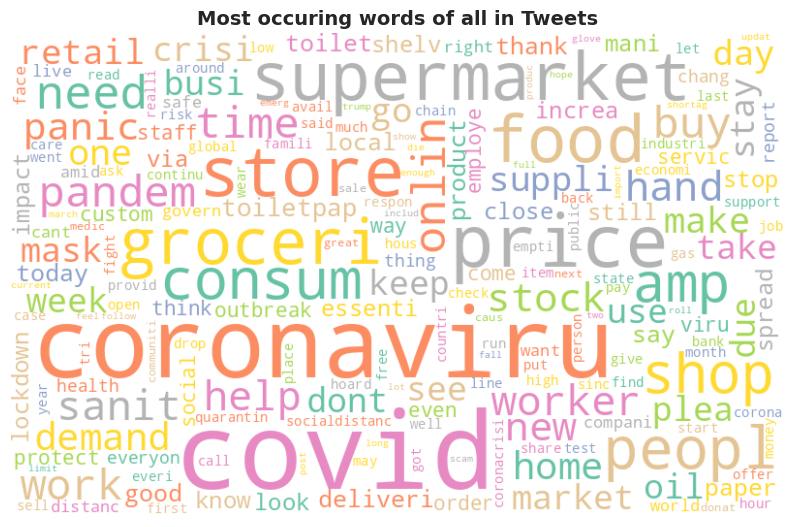

In [ ]:
# Most occuring words of all in Tweets

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

all_words = ' '.join([text for text in cloud_df.Cleaned_Tweet])
wordcloud = WordCloud(background_color="white", width=800, height=500, random_state=21, max_font_size=110, stopwords=set(STOPWORDS), colormap='Set2', collocations=False).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Most occuring words of all in Tweets', fontweight='bold', fontsize=14)
plt.show()


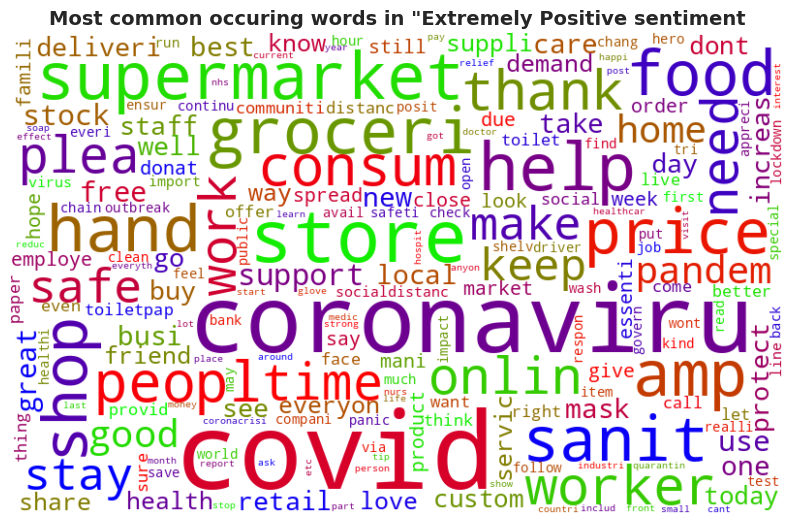

In [ ]:
# Most common occuring words in "Extremely Positive" sentiment
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

Extremely_Positive = ' '.join([text for text in cloud_df['Cleaned_Tweet'][cloud_df['Sentiment'] == 'Extremely Positive']])

wordcloud = WordCloud(background_color="white", width=800, height=500, random_state=21, max_font_size=110, stopwords=set(STOPWORDS), colormap='brg', collocations=False).generate(Extremely_Positive)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Most common occuring words in "Extremely Positive sentiment' , fontweight='bold', fontsize=14)
plt.show()


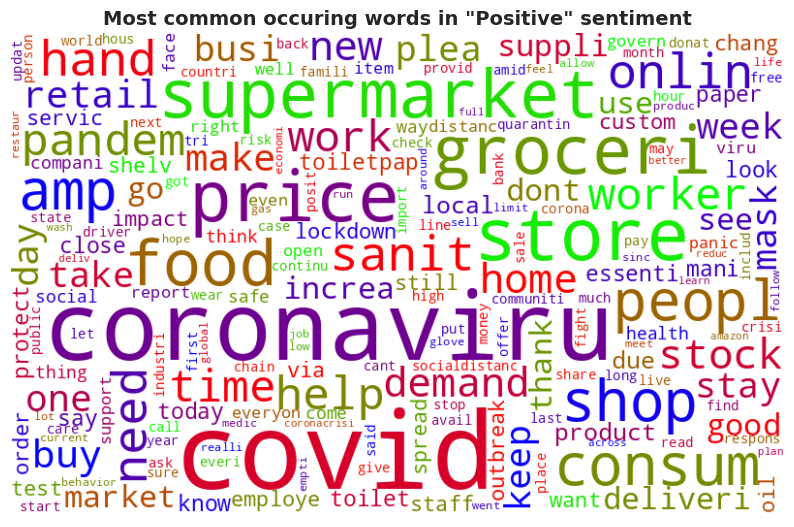

In [ ]:
# Most common occuring words in "Positive" sentiment
from wordcloud import WordCloud
import matplotlib.pyplot as plt

Positive = ' '.join(cloud_df.loc[cloud_df['Sentiment'] == 'Positive', 'Cleaned_Tweet'])

wordcloud = WordCloud(background_color='white', width=800, height=500, random_state=21, max_font_size=110, colormap='brg', collocations=False).generate(Positive)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Most common occuring words in "Positive" sentiment' , fontweight='bold', fontsize=14)
plt.axis('off')
plt.show()



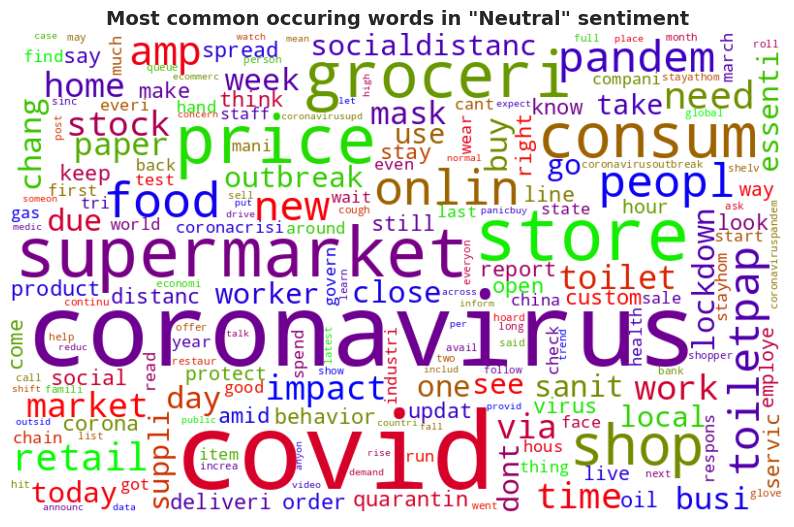

In [ ]:
# Most common occuring words in "Neutral" sentiment
from wordcloud import WordCloud
import matplotlib.pyplot as plt

Neutral = ' '.join(cloud_df.loc[cloud_df['Sentiment'] == 'Neutral', 'Cleaned_Tweet'])

wordcloud = WordCloud(background_color='white', width=800, height=500, random_state=21, max_font_size=110, colormap='brg', collocations=False).generate(Neutral)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Most common occuring words in "Neutral" sentiment' , fontweight='bold', fontsize=14)
plt.axis('off')
plt.show()

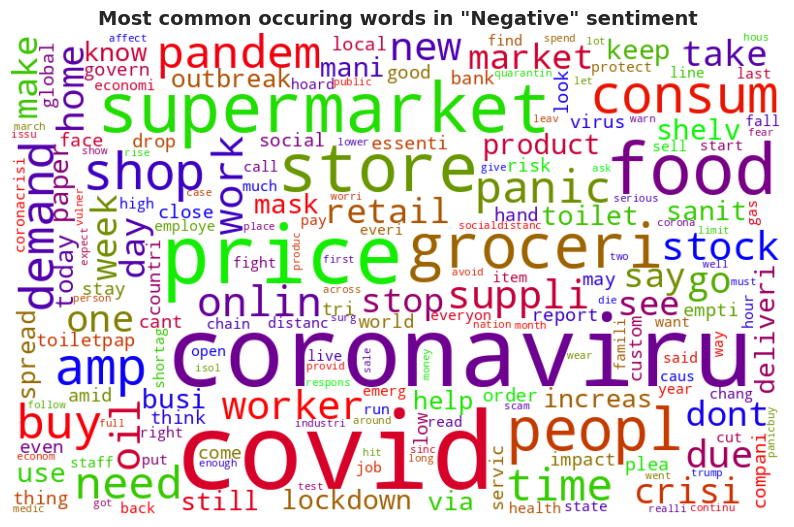

In [ ]:
# Most common occuring words in "Negative" sentiment
from wordcloud import WordCloud
import matplotlib.pyplot as plt

Negative = ' '.join(cloud_df.loc[cloud_df['Sentiment'] == 'Negative', 'Cleaned_Tweet'])

wordcloud = WordCloud(background_color='white', width=800, height=500, random_state=21, max_font_size=110, colormap='brg', collocations=False).generate(Negative)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Most common occuring words in "Negative" sentiment' , fontweight='bold', fontsize=14)
plt.axis('off')
plt.show()

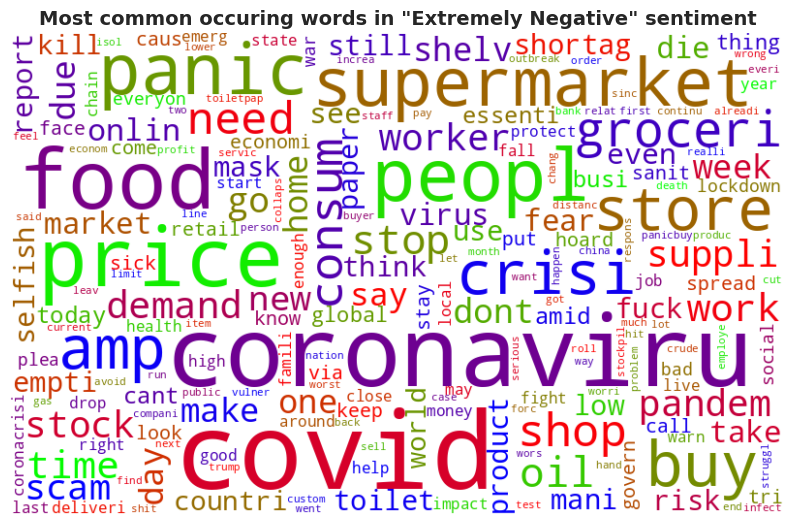

In [ ]:
# Most common occuring words in "Extremely Negative" sentiment
from wordcloud import WordCloud
import matplotlib.pyplot as plt

Extremely_Negative = ' '.join(cloud_df.loc[cloud_df['Sentiment'] == 'Extremely Negative', 'Cleaned_Tweet'])

wordcloud = WordCloud(background_color='white', width=800, height=500, random_state=21, max_font_size=110, colormap='brg', collocations=False).generate(Extremely_Negative)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Most common occuring words in "Extremely Negative" sentiment' , fontweight='bold', fontsize=14)
plt.axis('off')
plt.show()

##Feature Engineering

In [ ]:
# Encoding the sentiments from -1, 0 and 1 i.e., from extremely positive to extremely negative
sentiment_map = {"Extremely Negative":-1, "Negative":-1, "Neutral":0, "Positive":1,"Extremely Positive":1}
new_df['Sentiment'] = new_df['Sentiment'].map(sentiment_map)

The above code assigns numerical values to sentiment labels for encoding sentiment polarity.
Sentiment labels are mapped to -1, 0, or 1 for negative, neutral, and positive sentiments, respectively.
The map() function replaces sentiment labels with their corresponding numerical values.
This encoding facilitates sentiment analysis tasks, model training, statistical analysis, and machine learning algorithms.

In [ ]:
new_df.sample(2)

Cleaned_Tweet  \
16500  like support would pay busi close also like support busi stay open profit instead send home employe pay welcom consum coronavirus   
16273                                          your queu outsid supermarket open time your utter moron part problem covidiot coronavirus   

       Sentiment  
16500          1  
16273         -1

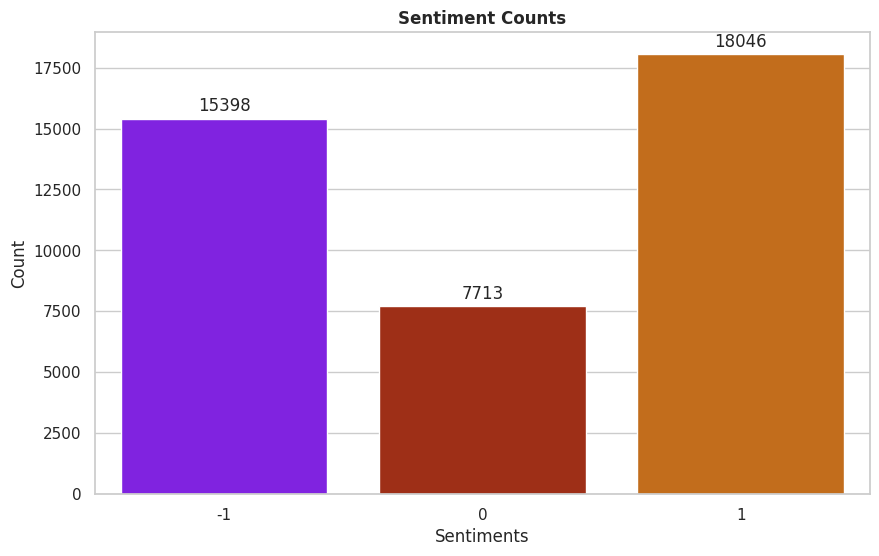

In [ ]:
plt.figure(figsize=(10, 6))
splot = sns.countplot(x='Sentiment', data=new_df, palette="gnuplot")

# Adding annotations
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center', xytext=(0, 9), textcoords='offset points')

plt.title("Sentiment Counts", fontweight='bold')
plt.ylabel("Count", fontsize=12)
plt.xlabel("Sentiments", fontsize=12)
plt.show()


The count plot visualizes the distribution of sentiment labels in the dataset. It indicates that there are 15,398 instances of negative sentiment (-1), 7,713 instances of neutral sentiment (0), and 18,046 instances of positive sentiment (1).

In [ ]:
# Checking shape
new_df.shape

(41157, 2)

In [ ]:
# Checking null values
new_df.isnull().sum()

Cleaned_Tweet    0
Sentiment        0
dtype: int64


Hence, based on the observation from the above code, it can be concluded that there are no NaN/Null values present in the dataset. This indicates that the dataset is clean and can be used for model development without any missing data.

##Spitting Our Dataset into Training And Testing Dataset ( For Multiclass Classification)

In [ ]:
train,valid = train_test_split(new_df,test_size = 0.2,random_state=0,stratify = new_df.Sentiment.values) #stratification means that the train_test_split method returns training and test subsets that have the same proportions of class labels as the input dataset.
print("train shape : ", train.shape)
print("valid shape : ", valid.shape)

train shape :  (32925, 2)
valid shape :  (8232, 2)


##Use Of Counter Vectorizer (Multi Class Classification)

CountVectorizer is a Python library used in NLP to convert text documents into numerical representations suitable for machine learning. It tokenizes the text, builds a vocabulary of words, assigns indices to each word, and creates a sparse matrix indicating word frequencies in each document.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
stop = list(stopwords.words('english'))
vectorizer = CountVectorizer(decode_error = 'replace',stop_words = stop)

X_train = vectorizer.fit_transform(train.Cleaned_Tweet.values)
X_valid = vectorizer.transform(valid.Cleaned_Tweet.values)

y_train = train.Sentiment.values
y_valid = valid.Sentiment.values

print("X_train.shape : ", X_train.shape)
print("X_valid.shape : ", X_valid.shape)
print("y_train.shape : ", y_train.shape)
print("y_valid.shape : ", y_valid.shape)

X_train.shape :  (32925, 32284)
X_valid.shape :  (8232, 32284)
y_train.shape :  (32925,)
y_valid.shape :  (8232,)


In [ ]:
# importing library
import matplotlib.pyplot as plt
from pylab import rcParams
from sklearn.metrics import f1_score

plt.rcParams["figure.figsize"] = (8,6)
labels = ['Negative', 'Neutral', 'Positive']

## Naive Bayes Classifier (For Multiclass Classification)

In [ ]:
# Importing library
from sklearn.naive_bayes import MultinomialNB


naiveByes_clf = MultinomialNB()

# Fitting the model train dataset so that model can learn parameter which is used in prediction
naiveByes_clf.fit(X_train,y_train)

# Checking accuracy
NB_prediction = naiveByes_clf.predict(X_valid)
NB_accuracy = accuracy_score(y_valid,NB_prediction)
print("training accuracy Score    : ",naiveByes_clf.score(X_train,y_train))
print("Validation accuracy Score : ",NB_accuracy )
print(classification_report(NB_prediction,y_valid))

training accuracy Score    :  0.7848443432042521
Validation accuracy Score :  0.672983479105928
              precision    recall  f1-score   support

          -1       0.76      0.67      0.71      3470
           0       0.23      0.68      0.34       519
           1       0.79      0.67      0.73      4243

    accuracy                           0.67      8232
   macro avg       0.59      0.67      0.59      8232
weighted avg       0.74      0.67      0.70      8232



##Stochastic Gradient Descent-SGD Classifier(For Multiclass Classification)

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(loss = 'hinge', penalty = 'l2', random_state=0)

sgd_clf.fit(X_train,y_train)

sgd_prediction = sgd_clf.predict(X_valid)
sgd_accuracy = accuracy_score(y_valid,sgd_prediction)
print("Training accuracy Score    : ",sgd_clf.score(X_train,y_train))
print("Validation accuracy Score : ",sgd_accuracy )
print(classification_report(sgd_prediction,y_valid))

Training accuracy Score    :  0.924707668944571
Validation accuracy Score :  0.8118318756073858
              precision    recall  f1-score   support

          -1       0.82      0.82      0.82      3095
           0       0.73      0.72      0.73      1565
           1       0.84      0.84      0.84      3572

    accuracy                           0.81      8232
   macro avg       0.80      0.80      0.80      8232
weighted avg       0.81      0.81      0.81      8232



##Random Forest Classifier (For Multiclass Classification)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()

rf_clf.fit(X_train,y_train)

rf_prediction = rf_clf.predict(X_valid)
rf_accuracy = accuracy_score(y_valid,rf_prediction)
print("Training accuracy Score    : ",rf_clf.score(X_train,y_train))
print("Validation accuracy Score : ",rf_accuracy )
print(classification_report(rf_prediction,y_valid))

Training accuracy Score    :  0.9998481397114655
Validation accuracy Score :  0.7694363459669582
              precision    recall  f1-score   support

          -1       0.75      0.79      0.77      2933
           0       0.68      0.71      0.69      1473
           1       0.83      0.78      0.80      3826

    accuracy                           0.77      8232
   macro avg       0.75      0.76      0.75      8232
weighted avg       0.77      0.77      0.77      8232



##Support vector machine( For Multiclass Classification)

In [ ]:
from sklearn.svm import SVC

svc = SVC()

svc.fit(X_train, y_train)

svc_prediction = svc.predict(X_valid)
svc_accuracy = accuracy_score(y_valid,svc_prediction)
print("Training accuracy Score    : ",svc.score(X_train,y_train))
print("Validation accuracy Score : ",svc_accuracy )
print(classification_report(svc_prediction,y_valid))

Training accuracy Score    :  0.9388914198936978
Validation accuracy Score :  0.7774538386783285
              precision    recall  f1-score   support

          -1       0.78      0.79      0.78      3043
           0       0.67      0.68      0.68      1507
           1       0.82      0.81      0.81      3682

    accuracy                           0.78      8232
   macro avg       0.76      0.76      0.76      8232
weighted avg       0.78      0.78      0.78      8232



##Logistic Regression(For Multiclass Classification)

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

logreg.fit(X_train, y_train)

logreg_prediction = logreg.predict(X_valid)
logreg_accuracy = accuracy_score(y_valid,logreg_prediction)
print("Training accuracy Score    : ",logreg.score(X_train,y_train))
print("Validation accuracy Score : ",logreg_accuracy )
print(classification_report(logreg_prediction,y_valid))

Training accuracy Score    :  0.9463629460895976
Validation accuracy Score :  0.7988338192419825
              precision    recall  f1-score   support

          -1       0.81      0.81      0.81      3089
           0       0.70      0.70      0.70      1550
           1       0.83      0.83      0.83      3593

    accuracy                           0.80      8232
   macro avg       0.78      0.78      0.78      8232
weighted avg       0.80      0.80      0.80      8232



##Catboost Model (For Multiclass Classification)

In [ ]:
!pip install catboost
!pip install ipywidgets
!jupyter nbextension enable --py widgetsnbextension

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 8.1 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.3 MB/s eta 0:00:00
Enabling notebook extension jupyter-js-widgets/extension...
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json
Paths used for configuration of notebook: 
    	
      - Validating: OK
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json


In [ ]:
from catboost import CatBoostClassifier, Pool, cv
from sklearn.metrics import accuracy_score

clf2 = CatBoostClassifier()


clf2.fit(X_train, y_train,
        eval_set=(X_valid, y_valid),
        verbose=False
)

print('CatBoost model is fitted: ' + str(clf2.is_fitted()))
print('CatBoost model parameters:')
print(clf2.get_params())

CatBoost model is fitted: True
CatBoost model parameters:
{}


In [ ]:
catboost_prediction = clf2.predict(X_valid)
catboost_accuracy = accuracy_score(y_valid,catboost_prediction)
print("Training accuracy Score    : ",clf2.score(X_train,y_train))
print("Validation accuracy Score : ",catboost_accuracy )
print(classification_report(catboost_prediction,y_valid))

Training accuracy Score    :  0.8282763857251328
Validation accuracy Score :  0.8081875607385811
              precision    recall  f1-score   support

          -1       0.79      0.83      0.81      2946
           0       0.78      0.71      0.74      1676
           1       0.84      0.84      0.84      3610

    accuracy                           0.81      8232
   macro avg       0.80      0.79      0.80      8232
weighted avg       0.81      0.81      0.81      8232



##All multiclass model's Test accuracy in descending order.

In [ ]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'Logistic Regression',
              'Random Forest', 'Naive Bayes',
              'Stochastic Gradient Decent', 'CatBoost'],
    'Test accuracy': [svc_accuracy, logreg_accuracy,
              rf_accuracy, NB_accuracy,
              sgd_accuracy, catboost_accuracy]})

models.sort_values(by='Test accuracy', ascending=False)

Model  Test accuracy
4  Stochastic Gradient Decent       0.811832
5                    CatBoost       0.808188
1         Logistic Regression       0.798834
0     Support Vector Machines       0.777454
2               Random Forest       0.769436
3                 Naive Bayes       0.672983

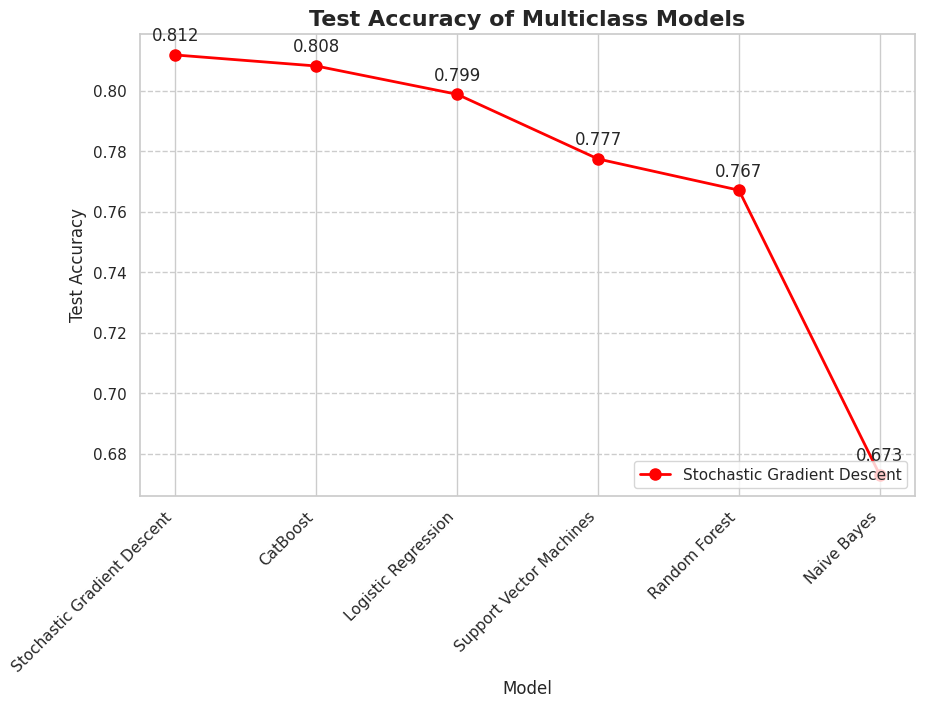

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

models = pd.DataFrame({
    'Model': ['Stochastic Gradient Descent', 'CatBoost', 'Logistic Regression', 'Support Vector Machines', 'Random Forest', 'Naive Bayes'],
    'Test Accuracy': [0.811832, 0.808188, 0.798834, 0.777454, 0.767128, 0.672983]
})

models_sorted = models.sort_values(by='Test Accuracy', ascending=False)

# Set up figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Line plot with red color
ax.plot(models_sorted['Model'], models_sorted['Test Accuracy'], marker='o', linewidth=2, color='red')

# Customize line marker styles
for i, line in enumerate(ax.lines):
    line.set_markersize(8)
    line.set_markeredgewidth(1)

# Title and labels
ax.set_title('Test Accuracy of Multiclass Models', fontsize=16, fontweight='bold')
ax.set_xlabel('Model', fontsize=12)
ax.set_ylabel('Test Accuracy', fontsize=12)

# Gridlines
ax.grid(axis='y', linestyle='--')

# Legend
ax.legend(models_sorted['Model'], loc='lower right')

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

# Add numbers on data points
for x, y in zip(models_sorted['Model'], models_sorted['Test Accuracy']):
    ax.annotate(f'{y:.3f}', (x, y), textcoords="offset points", xytext=(0, 10), ha='center')

# Display the plot
plt.show()


* Stochastic Gradient Descent (SGD) achieves the highest test accuracy of 0.811832. SGD is a popular optimization algorithm that can be used for both binary and multiclass classification tasks. It performs well in scenarios with a large number of features and instances.

* CatBoost, with a test accuracy of 0.808188, is the second-best performing model. CatBoost is a gradient boosting algorithm that handles categorical features effectively. It is known for its ability to handle complex relationships between features and the target variable.

* Logistic Regression achieves a test accuracy of 0.798834, placing it in the third position. Logistic Regression is a commonly used linear classification algorithm that can be extended to multiclass problems using techniques such as one-vs-rest or softmax regression.

* Support Vector Machines (SVM) achieves a test accuracy of 0.777454, ranking it fourth. SVMs are powerful algorithms for both binary and multiclass classification tasks. They work by finding an optimal hyperplane that maximally separates the classes in the feature space.

* Random Forest, with a test accuracy of 0.769436, is the fifth-best performing model. Random Forest is an ensemble method that combines multiple decision trees. It can handle multiclass problems and is robust against overfitting.

* Naive Bayes has the lowest test accuracy of 0.672983 among the listed models. Naive Bayes assumes independence among features given the class label. While it is simple and computationally efficient, it may not capture complex relationships in the data.

##Coverting our multiclass classification into Binary Classification


In [ ]:
new_df.sample(5)

Cleaned_Tweet  \
23231                                                                                   elain decad ahead time seinfeld toiletpap coronavirus   
7288                                     someon tell hoarder pack everi groceri store day long isnt social distanc coronavirus covid panicbuy   
27948  refus entri young lad year old supermarket hes take ecstasi pill smoke weed like bloodi parti lol coronavirus socialdistanc lockdownuk   
13233                                   covid pro tip eastern european hard fuck noth panic bought local polish supermarket easiest shop ever   
12271                                              quot there reason buy roll toiletpap realli isnt even go put covid coronavirus brief march   

       Sentiment  
23231          0  
7288           0  
27948          1  
13233          1  
12271         -1

In [ ]:
binary_df  = new_df[['Cleaned_Tweet','Sentiment']]

In [ ]:
binary_df["Sentiment"]= binary_df["Sentiment"].replace(1,1)
binary_df["Sentiment"]= binary_df["Sentiment"].replace(0,1)
binary_df["Sentiment"]= binary_df["Sentiment"].replace(-1,0)


In [ ]:
binary_df['Sentiment'].value_counts()

1    25759
0    15398
Name: Sentiment, dtype: int64

In [ ]:
# assigning dependent and independent variables.
X = binary_df.drop('Sentiment', axis=1)
y = binary_df.Sentiment

##Dividing our dataset into Training and Testing


In [ ]:
from sklearn.model_selection import train_test_split

train,valid = train_test_split(binary_df,test_size = 0.2,random_state=0,stratify = binary_df.Sentiment.values)
print("train shape : ", train.shape)
print("valid shape : ", valid.shape)

train shape :  (32925, 2)
valid shape :  (8232, 2)


##Using Count Vectorizer


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
stop = list(stopwords.words('english'))
vectorizer = CountVectorizer(decode_error = 'replace',stop_words = stop)

X_train = vectorizer.fit_transform(train.Cleaned_Tweet.values)
X_valid = vectorizer.transform(valid.Cleaned_Tweet.values)

y_train = train.Sentiment.values
y_valid = valid.Sentiment.values

print("X_train.shape : ", X_train.shape)
print("X_valid.shape : ", X_valid.shape)
print("y_train.shape : ", y_train.shape)
print("y_valid.shape : ", y_valid.shape)

X_train.shape :  (32925, 32187)
X_valid.shape :  (8232, 32187)
y_train.shape :  (32925,)
y_valid.shape :  (8232,)


##Naive Bayes Classifier (Binary Classification)


In [ ]:
from sklearn.naive_bayes import MultinomialNB

naiveByes_clf = MultinomialNB()

naiveByes_clf.fit(X_train,y_train)

NB_prediction = naiveByes_clf.predict(X_valid)
NB_accuracy = accuracy_score(y_valid,NB_prediction)
print("training accuracy Score    : ",naiveByes_clf.score(X_train,y_train))
print("Validation accuracy Score : ",NB_accuracy )
print(classification_report(NB_prediction,y_valid))

training accuracy Score    :  0.8635079726651481
Validation accuracy Score :  0.7943391642371235
              precision    recall  f1-score   support

           0       0.69      0.74      0.72      2875
           1       0.86      0.82      0.84      5357

    accuracy                           0.79      8232
   macro avg       0.77      0.78      0.78      8232
weighted avg       0.80      0.79      0.80      8232



##Random Forest Classifier (Binary Classification)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()

rf_clf.fit(X_train,y_train)

rf_prediction = rf_clf.predict(X_valid)
rf_accuracy = accuracy_score(y_valid,rf_prediction)
print("Training accuracy Score    : ",rf_clf.score(X_train,y_train))
print("Validation accuracy Score : ",rf_accuracy )
print(classification_report(rf_prediction,y_valid))

Training accuracy Score    :  0.9999088838268793
Validation accuracy Score :  0.8222789115646258
              precision    recall  f1-score   support

           0       0.69      0.81      0.74      2633
           1       0.90      0.83      0.86      5599

    accuracy                           0.82      8232
   macro avg       0.80      0.82      0.80      8232
weighted avg       0.83      0.82      0.83      8232



##Logistic Regression(Binary Classification)


In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

logreg.fit(X_train, y_train)

logreg_prediction = logreg.predict(X_valid)
logreg_accuracy = accuracy_score(y_valid,logreg_prediction)
print("Training accuracy Score    : ",logreg.score(X_train,y_train))
print("Validation accuracy Score : ",logreg_accuracy )
print(classification_report(logreg_prediction,y_valid))

Training accuracy Score    :  0.9421412300683372
Validation accuracy Score :  0.8628522837706512
              precision    recall  f1-score   support

           0       0.77      0.85      0.81      2801
           1       0.92      0.87      0.89      5431

    accuracy                           0.86      8232
   macro avg       0.84      0.86      0.85      8232
weighted avg       0.87      0.86      0.86      8232



##Catboost Algorithm (Binary Classification)


In [ ]:
clf2 = CatBoostClassifier()


clf2.fit(X_train, y_train,
        eval_set=(X_valid, y_valid),
        verbose=False
)

print('CatBoost model is fitted: ' + str(clf2.is_fitted()))
print('CatBoost model parameters:')
print(clf2.get_params())

CatBoost model is fitted: True
CatBoost model parameters:
{}


In [ ]:
catboost_prediction = clf2.predict(X_valid)
catboost_accuracy = accuracy_score(y_valid,catboost_prediction)
print("Training accuracy Score    : ",clf2.score(X_train,y_train))
print("Validation accuracy Score : ",catboost_accuracy )
print(classification_report(catboost_prediction,y_valid))

Training accuracy Score    :  0.8826423690205012
Validation accuracy Score :  0.848153547133139
              precision    recall  f1-score   support

           0       0.71      0.86      0.78      2570
           1       0.93      0.84      0.88      5662

    accuracy                           0.85      8232
   macro avg       0.82      0.85      0.83      8232
weighted avg       0.86      0.85      0.85      8232



##Support Vector Machine (Binary Classification)


In [ ]:
from sklearn.svm import SVC

svc = SVC()

svc.fit(X_train, y_train)

svc_prediction = svc.predict(X_valid)
svc_accuracy = accuracy_score(y_valid,svc_prediction)
print("Training accuracy Score    : ",svc.score(X_train,y_train))
print("Validation accuracy Score : ",svc_accuracy )
print(classification_report(svc_prediction,y_valid))

Training accuracy Score    :  0.9586028853454821
Validation accuracy Score :  0.8415937803692906
              precision    recall  f1-score   support

           0       0.69      0.86      0.77      2480
           1       0.93      0.83      0.88      5752

    accuracy                           0.84      8232
   macro avg       0.81      0.85      0.82      8232
weighted avg       0.86      0.84      0.85      8232



##Stochastic Gradient Descent-SGD Classifier( Binary Classification)

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(loss = 'hinge', penalty = 'l2', random_state=0)

sgd_clf.fit(X_train,y_train)

sgd_prediction = sgd_clf.predict(X_valid)
sgd_accuracy = accuracy_score(y_valid,sgd_prediction)
print("Training accuracy Score    : ",sgd_clf.score(X_train,y_train))
print("Validation accuracy Score : ",sgd_accuracy )
print(classification_report(sgd_prediction,y_valid))

Training accuracy Score    :  0.9376765375854215
Validation accuracy Score :  0.864067055393586
              precision    recall  f1-score   support

           0       0.77      0.85      0.81      2807
           1       0.92      0.87      0.89      5425

    accuracy                           0.86      8232
   macro avg       0.85      0.86      0.85      8232
weighted avg       0.87      0.86      0.87      8232



In [ ]:
# Get the predicted classes
train_class_preds = sgd_clf.predict(X_train)
test_class_preds = sgd_clf.predict(X_valid)

[[10964  1354]
 [  698 19909]]


[Text(0, 0.5, 'Negative'), Text(0, 1.5, 'Positive')]

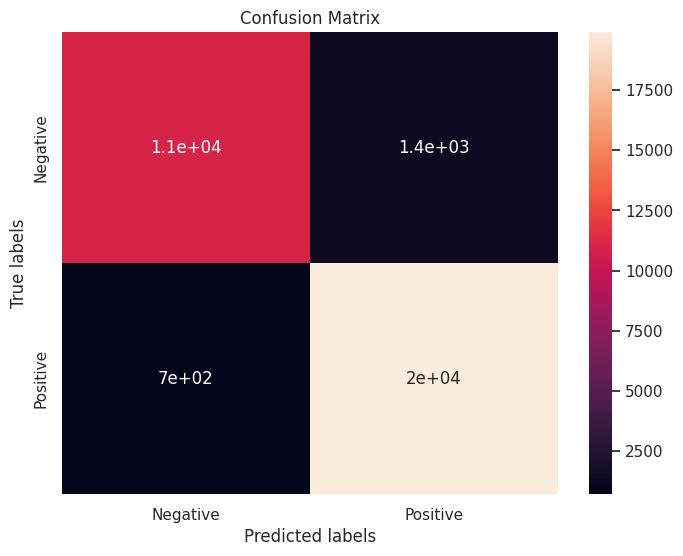

In [ ]:
# Get the confusion matrix for both train and test. We are getting very low type and type 2 errors.

labels = ['Negative', 'Positive']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:

# Let's check the overall accuracy. Overall accuracy is very good.
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss

y_pred = sgd_clf.predict(X_valid)

score =accuracy_score(y_valid,y_pred)
print('accuracy is', score)

accuracy is 0.864067055393586


In [ ]:
# F1 score for our classifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix


y_pred =  sgd_clf.predict(X_valid)
print(f1_score(y_valid,y_pred, average="macro"))

0.8520622844286567


In [ ]:
#score is mean accuracy
scikit_score = sgd_clf.score(X_valid,y_valid)
print('scikit score:', scikit_score)

scikit score: 0.864067055393586


In [ ]:
# Recall score for our winner model
recall_score(y_valid, y_pred, average='macro')


0.8459609683794467

In [ ]:
# Classification Report for our stochastic gradient descent algorithm
classification_report(y_valid,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.85      0.77      0.81      3080\n           1       0.87      0.92      0.89      5152\n\n    accuracy                           0.86      8232\n   macro avg       0.86      0.85      0.85      8232\nweighted avg       0.86      0.86      0.86      8232\n'

In [ ]:
# Very low type 1 and type 2 error
confusion_matrix(y_valid,y_pred)

array([[2384,  696],
       [ 423, 4729]])

##Evaluation of all Binary Classification Models


In [ ]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'Logistic Regression',
              'Random Forest', 'Naive Bayes',
              'Stochastic Gradient Decent','CatBoost'],
    'Test accuracy': [svc_accuracy, logreg_accuracy,
              rf_accuracy, NB_accuracy,
              sgd_accuracy ,catboost_accuracy]})

models.sort_values(by='Test accuracy', ascending=False)

Model  Test accuracy
4  Stochastic Gradient Decent       0.864067
1         Logistic Regression       0.862852
5                    CatBoost       0.848154
0     Support Vector Machines       0.841594
2               Random Forest       0.822279
3                 Naive Bayes       0.794339

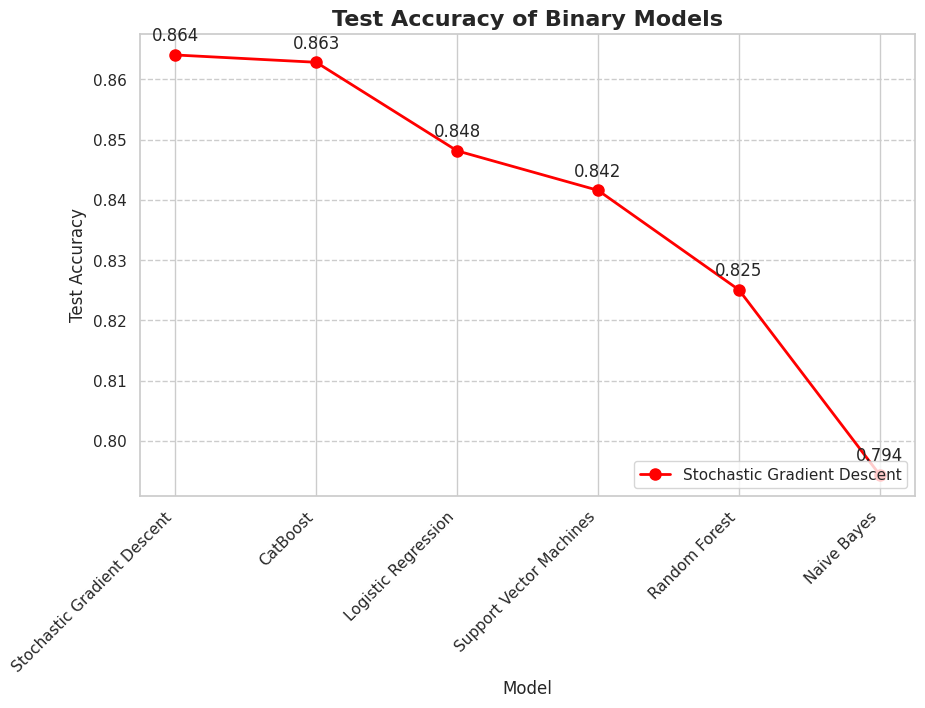

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

models = pd.DataFrame({
    'Model': ['Stochastic Gradient Descent', 'CatBoost', 'Logistic Regression', 'Support Vector Machines', 'Random Forest', 'Naive Bayes'],
    'Test Accuracy': [0.864067, 0.862852, 0.848154, 0.841594, 0.825073, 0.794339]
})

models_sorted = models.sort_values(by='Test Accuracy', ascending=False)

# Set up figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Line plot with red color
ax.plot(models_sorted['Model'], models_sorted['Test Accuracy'], marker='o', linewidth=2, color='red')

# Customize line marker styles
for i, line in enumerate(ax.lines):
    line.set_markersize(8)
    line.set_markeredgewidth(1)

# Title and labels
ax.set_title('Test Accuracy of Binary Models', fontsize=16, fontweight='bold')
ax.set_xlabel('Model', fontsize=12)
ax.set_ylabel('Test Accuracy', fontsize=12)

# Gridlines
ax.grid(axis='y', linestyle='--')

# Legend
ax.legend(models_sorted['Model'], loc='lower right')

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

# Add numbers on data points
for x, y in zip(models_sorted['Model'], models_sorted['Test Accuracy']):
    ax.annotate(f'{y:.3f}', (x, y), textcoords="offset points", xytext=(0, 10), ha='center')

# Display the plot
plt.show()


* Stochastic Gradient Descent (SGD) achieves the highest test accuracy of 0.864067. SGD is known for its efficiency and scalability, making it suitable for large datasets. It performs well in binary classification tasks by updating the model's parameters using gradient information.

* Logistic Regression comes in second place with a test accuracy of 0.862852. Logistic Regression is a widely used linear classification algorithm that models the probability of the input belonging to a certain class. It performs well when the relationship between features and the target variable is approximately linear.

* CatBoost achieves a test accuracy of 0.848154, placing it in third position. CatBoost is a gradient boosting algorithm that handles categorical features effectively. It performs well in binary classification tasks by constructing an ensemble of decision trees and combining their predictions.

* Support Vector Machines (SVM) achieves a test accuracy of 0.841594, ranking it fourth. SVMs are powerful algorithms for binary classification tasks. They work by finding an optimal hyperplane that maximally separates the classes in the feature space.

* Random Forest has a test accuracy of 0.822279, placing it in fifth position. Random Forest is an ensemble method that combines multiple decision trees. It performs well in binary classification tasks by averaging the predictions of individual trees.

* Naive Bayes has the lowest test accuracy of 0.794339 among the listed models. Naive Bayes is a simple probabilistic classifier based on Bayes' theorem. It assumes independence among features given the class label, which may limit its performance in certain scenarios.

##Conclusion

* **In terms of overall performance**: The models generally achieve higher test accuracies in the binary classification task compared to the multiple classification task. This suggests that the models find it easier to distinguish between two classes than to classify instances into multiple classes.

* **Consistent top-performing models**: Stochastic Gradient Descent (SGD) and CatBoost consistently perform well in both the binary and multiple classification tasks, ranking among the top models in both scenarios. This indicates that these models have a good ability to handle different classification tasks effectively.

* **Logistic Regression and Support Vector Machines (SVM)**: Both Logistic Regression and SVM perform well in both the binary and multiple classification tasks. However, their performance is slightly better in the binary classification scenario. This can be attributed to their inherent characteristics, which are well-suited for binary classification.

* **Random Forest and Naive Bayes**: Random Forest and Naive Bayes also exhibit similar trends in both tasks, with slightly lower test accuracies compared to other models. These models may struggle more with the complexity and dimensionality of the multiple classification problem, leading to a decrease in performance compared to the binary classification scenario.

* **Performance gap**: There is a notable difference in test accuracies between the top-performing models (e.g., SGD, CatBoost, Logistic Regression) and the lower-performing models (e.g., Naive Bayes, Random Forest) in both tasks. This indicates that the choice of the model can significantly impact the classification performance, highlighting the importance of selecting appropriate algorithms for specific classification tasks.

The comparison between binary and multiple classification accuracies suggests that some models perform consistently well across different classification tasks, while others may struggle more when faced with the complexity of multiple classes.